### Problem Definition

**Problem:** ConnectTel is experiencing a significant issue with customer churn, which is the tendency of customers to discontinue their service with the company. This problem affects the company's revenue and growth. The aim is to develop a robust customer churn prediction system using advanced analytics and machine learning techniques to forecast which customers are likely to churn and implement targeted retention strategies.

**Target Variable:** The target variable for customer churn analysis is Churn, which indicates whether a customer has cancelled their service **(Yes)** or not **(No)**.

### Load Libraries

In [133]:
# Data Analysis
import pandas as pd 
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno # Missing Values
from collections import Counter # Counting
# Data Preprocessing
# Model Selection and Training
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
# Model Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import QuantileTransformer, StandardScaler
# class imbalance
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Summary Statistics

In [134]:
data = 'Customer-Churn.csv'

In [135]:
# load dataset into a variable
cs_data = pd.read_csv(data, sep=',', na_values=['nan', 'NaN', 'NA', ' '], keep_default_na=False)

In [137]:
# check columns and rows
cs_data.shape

(7043, 21)

In [138]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Handle Missing Values

In [139]:
# Check for missing value
cs_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

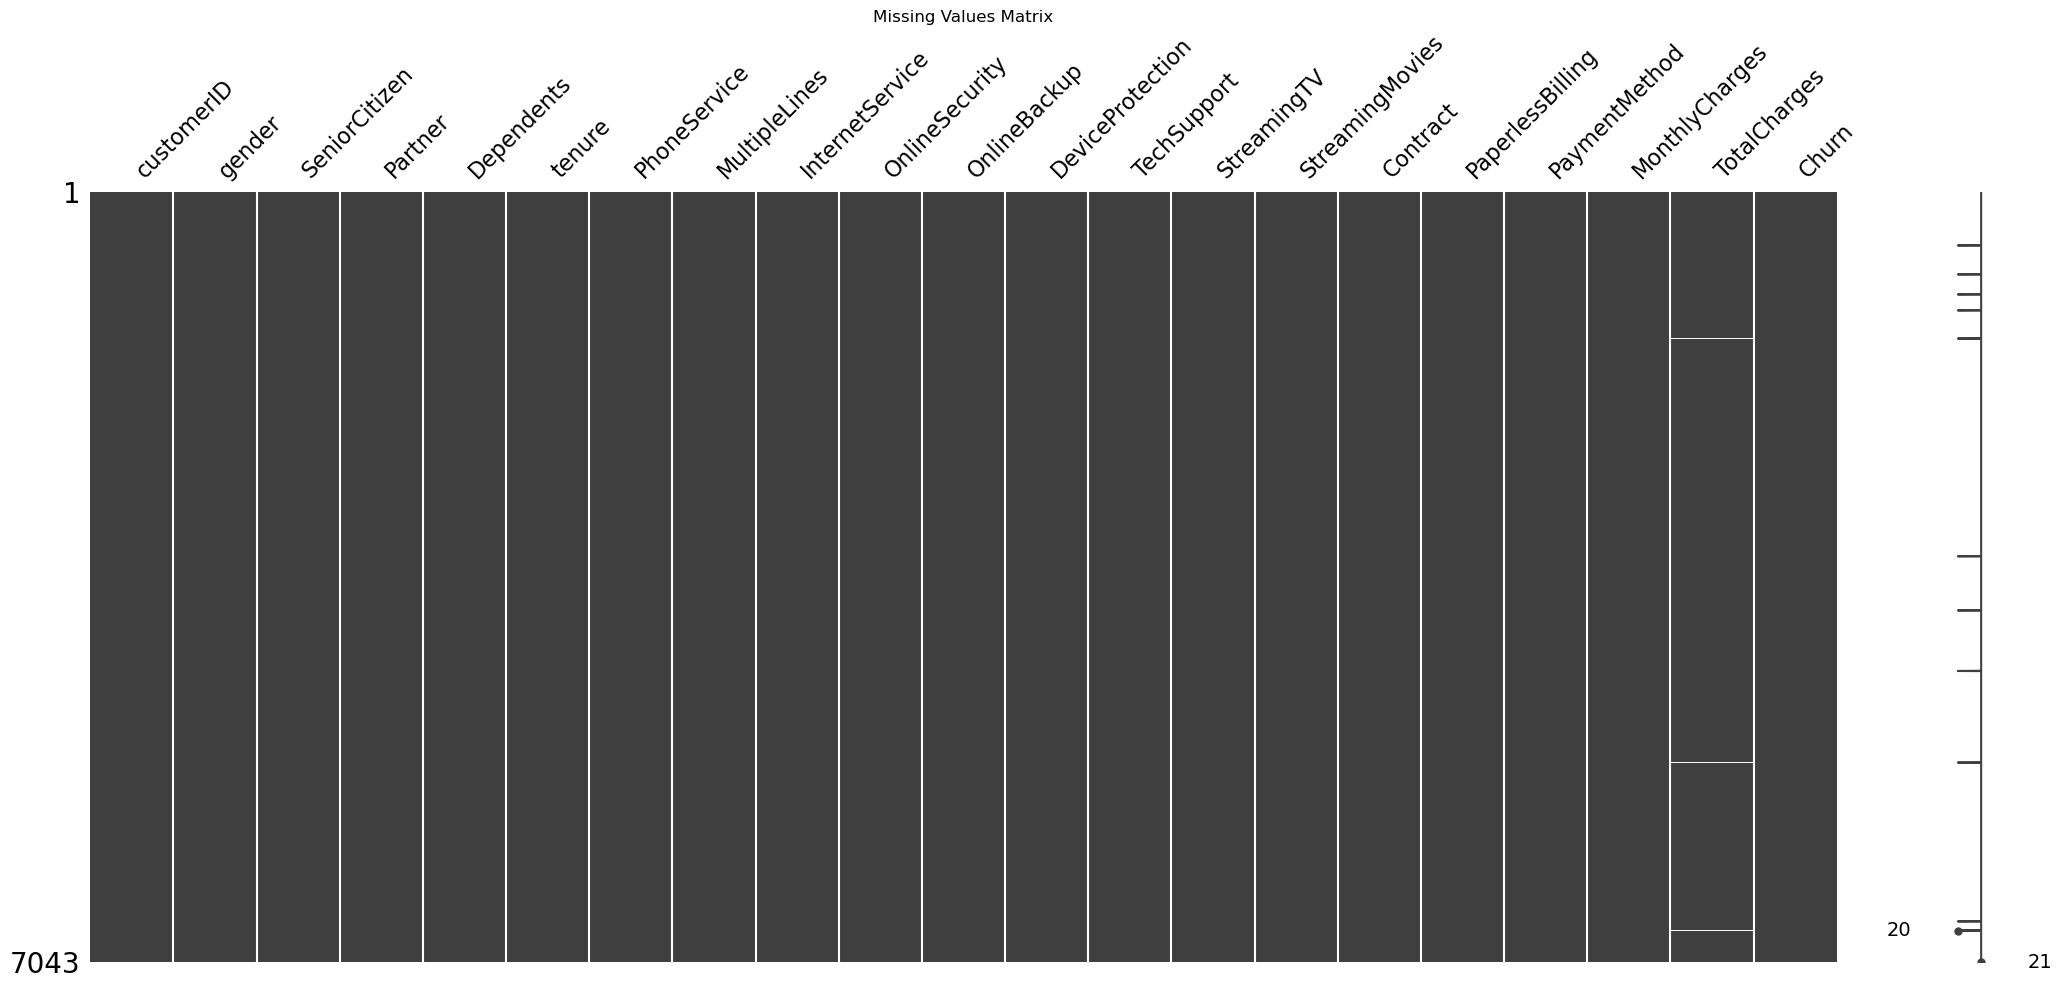

In [140]:
# Visualise the missing values matrix
msno.matrix(cs_data).set_title('Missing Values Matrix');

In [141]:
# Analysis rows with missing values
rows_with_missing_data = cs_data[cs_data.isna().any(axis=1)]
rows_with_missing_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [142]:
# drop missing values
cs_data.dropna(inplace=True)

### Overview of the Dataset

The raw dataset consists of 7043 observations (rows) and 21 features (columns/variables). Each observation represents a customer and their associated details, which include:

- **Demographic Information:** (customerID, gender, SeniorCitizen, Partner and Dependents)
- **Account Information:** (tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges)
- **Service Information**: (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies), and
- **Churn Information**: (Churn)

####  There are 11 blank values in the TotalCharges variable in the dataset.

Missing values were handled by dropping the 11 rows with NaNs in TotalCharges, and the CustomerID feature was also dropped. A summary of the data types shows 16 features with Objects (Categorical), 2 features with Integer (Numerical) and 2 features with Floats (Numerical)

### Detailed Description of Features and Data Types
- customerID: Unique identifier for each customer (object).
- gender: Customer's gender, either Male or Female (object).
- SeniorCitizen: Indicates if the customer is a senior citizen (1 for Yes, 0 for No) (int64).
- Partner: Indicates if the customer has a partner (Yes/No) (object).
- Dependents: Indicates if the customer has dependents (Yes/No) (object).
- tenure: Number of months the customer has been with the company (int64).
- PhoneService: Indicates if the customer has phone service (Yes/No) (object).
- MultipleLines: Indicates if the customer has multiple lines (Yes/No/No phone service) (object).
- InternetService: Type of internet service (DSL/Fiber optic/No) (object).
- OnlineSecurity: Indicates if the customer has online security (Yes/No/No internet service) (object).
- OnlineBackup: Indicates if the customer has online backup (Yes/No/No internet service) (object).
- DeviceProtection: Indicates if the customer has device protection (Yes/No/No internet service) (object).
- TechSupport: Indicates if the customer has tech support (Yes/No/No internet service) (object).
- StreamingTV: Indicates if the customer has streaming TV (Yes/No/No internet service) (object).
- StreamingMovies: Indicates if the customer has streaming movies (Yes/No/No internet service) (object).
- Contract: Type of contract (Month-to-month/One year/Two year) (object).
- PaperlessBilling: Indicates if the customer has paperless billing (Yes/No) (object).
- PaymentMethod: Payment method used by the customer (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)) (object).
- MonthlyCharges: Monthly charges billed to the customer (float64).
- TotalCharges: Total charges billed to the customer (float64).
- Churn: Indicates if the customer has churned (Yes/No) (object).

### Feature Engineering

In [143]:
# drop column
cs_data.drop('customerID', axis=1, inplace=True)
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [144]:
# rename values in the payment method variable
cs_data['PaymentMethod'] = cs_data['PaymentMethod'].replace(
    ['Credit card (automatic)', 'Bank transfer (automatic)'], 
    ['Credit card', 'Bank transfer']
)
cs_data[['PaymentMethod']].loc[3:6]

PaymentMethod
3     Bank transfer
4  Electronic check
5  Electronic check
6       Credit card

In [145]:
# Define churn label and encode the label
# define a churn label variable
churn_label = cs_data['Churn'] 
churn_label_encode = churn_label.apply(lambda x: 1 if x == 'Yes' else 0)
# display values 
churn_label.head(3), churn_label_encode.head(3)

(0     No
 1     No
 2    Yes
 Name: Churn, dtype: object,
 0    0
 1    0
 2    1
 Name: Churn, dtype: int64)

In [146]:
# Create Total Services Feature
# Define the services columns
service_columns = cs_data[[
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]]

# Write a function to count total services, including internet services (DSL and Fiber optic services)
def total_services(row):
    # define container variables for count
    count_yes = 0
    count_dsl = 0
    count_fiber = 0
    # loop through service columns
    for column in service_columns:
        if row[column] == 'Yes':
            count_yes += 1
    # loop through internet services column        
    if row['InternetService'] == 'DSL':
        count_dsl += 1
        
    if row['InternetService'] == 'Fiber optic':
        count_fiber += 1
    # return and sum counts    
    return count_yes + count_dsl + count_fiber

# Apply the function to create the new feature
cs_data['TotalServices'] = cs_data.apply(total_services, axis=1)

cs_data[[
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalServices'
]].loc[12:17]

PhoneService MultipleLines InternetService       OnlineSecurity  \
12          Yes           Yes     Fiber optic                   No   
13          Yes           Yes     Fiber optic                   No   
14          Yes            No     Fiber optic                  Yes   
15          Yes           Yes     Fiber optic                  Yes   
16          Yes            No              No  No internet service   
17          Yes           Yes     Fiber optic                  Yes   

           OnlineBackup     DeviceProtection          TechSupport  \
12                   No                  Yes                   No   
13                  Yes                  Yes                   No   
14                   No                  Yes                  Yes   
15                  Yes                  Yes                  Yes   
16  No internet service  No internet service  No internet service   
17                   No                  Yes                   No   

            StreamingTV      StreamingMovies  TotalServices  
12                  Yes                  Yes              6  
13                  Yes                  Yes              7  
14                  Yes                  Yes              7  
15                  Yes                  Yes              9  
16  No internet service  No internet service              1  
17                  Yes                  Yes              7

In [147]:
# Create a new feature to categorise the SeniorCitizen column using lambda function
cs_data['SeniorCitizenCat'] = cs_data['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
# Display rows from 21 to 30
cs_data[['SeniorCitizen', 'SeniorCitizenCat']].iloc[30:35]

SeniorCitizen SeniorCitizenCat
30              1              Yes
31              1              Yes
32              0               No
33              0               No
34              1              Yes

In [148]:
# drop the senior citizens
cs_data.drop(['SeniorCitizen'], axis=1, inplace=True)

### Exploratory Data Analysis (EDA)

### Summary Statistics

In [149]:
# Summary statistics for numerical columns
cs_data.describe()

tenure  MonthlyCharges  TotalCharges  TotalServices
count  7032.000000     7032.000000   7032.000000    7032.000000
mean     32.421786       64.798208   2283.300441       4.147184
std      24.545260       30.085974   2266.771362       2.312294
min       1.000000       18.250000     18.800000       1.000000
25%       9.000000       35.587500    401.450000       2.000000
50%      29.000000       70.350000   1397.475000       4.000000
75%      55.000000       89.862500   3794.737500       6.000000
max      72.000000      118.750000   8684.800000       9.000000

### Summary Statistics for Numerical Columns

Out of 7032 customers, only 16.24% are senior citizens, indicating a skew towards younger or middle-aged customers. Customer tenure ranges from 1 to 72 months, with an average of 32 months and a median of 29 months, reflecting varied loyalty. Monthly charges range from 18.25 to 118.75, averaging 64.80 and a median of 70.35. Total charges vary from 18.80 to 8684.80, with an average of 2283.30 and a median of 1397.48. 

**These figures highlight significant variability in customer retention, monthly billing, and accumulated charges, influenced by differing service plans and usage patterns.**

In [150]:
# Summary statistics for categorical columns
cat_sum_stats = cs_data.describe(include=['object'])
cat_sum_stats

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7032    7032       7032         7032          7032            7032   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3549    3639       4933         6352          3385            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7032         7032             7032        7032        7032   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3497         3087             3094        3472        2809   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7032            7032             7032              7032   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2781            3875             4168              2365   

       Churn SeniorCitizenCat  
count   7032             7032  
unique     2                2  
top       No               No  
freq    5163             5890

### Summary Statistics for Categorical Variables
There is a balanced gender distribution, with males slightly higher by 1%. About 52% of customers are single, and nearly 70% do not have dependents. Phone service is nearly universal at 90%, though 48% do not have multiple lines. Fiber optic internet is preferred by 44% of customers. Many do not use additional services like online security (50%) and streaming (around 2,800 customers each). Most customers (3,875) prefer month-to-month contracts, and 4,168 opt for paperless billing. Electronic check is the most popular payment method. A low churn rate with 5,163 customers indicates high satisfaction and loyalty.

## Data Visualization

In [151]:
# extract numerical and categorical columns from the dataframe
categorical_columns = cs_data.select_dtypes(include=['object']).columns
numerical_columns = cs_data.select_dtypes(include=['int64', 'float64']).columns

numerical_columns, categorical_columns

(Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizenCat'],
       dtype='object'))

#### Univariate Analysis (Categorical Variables)

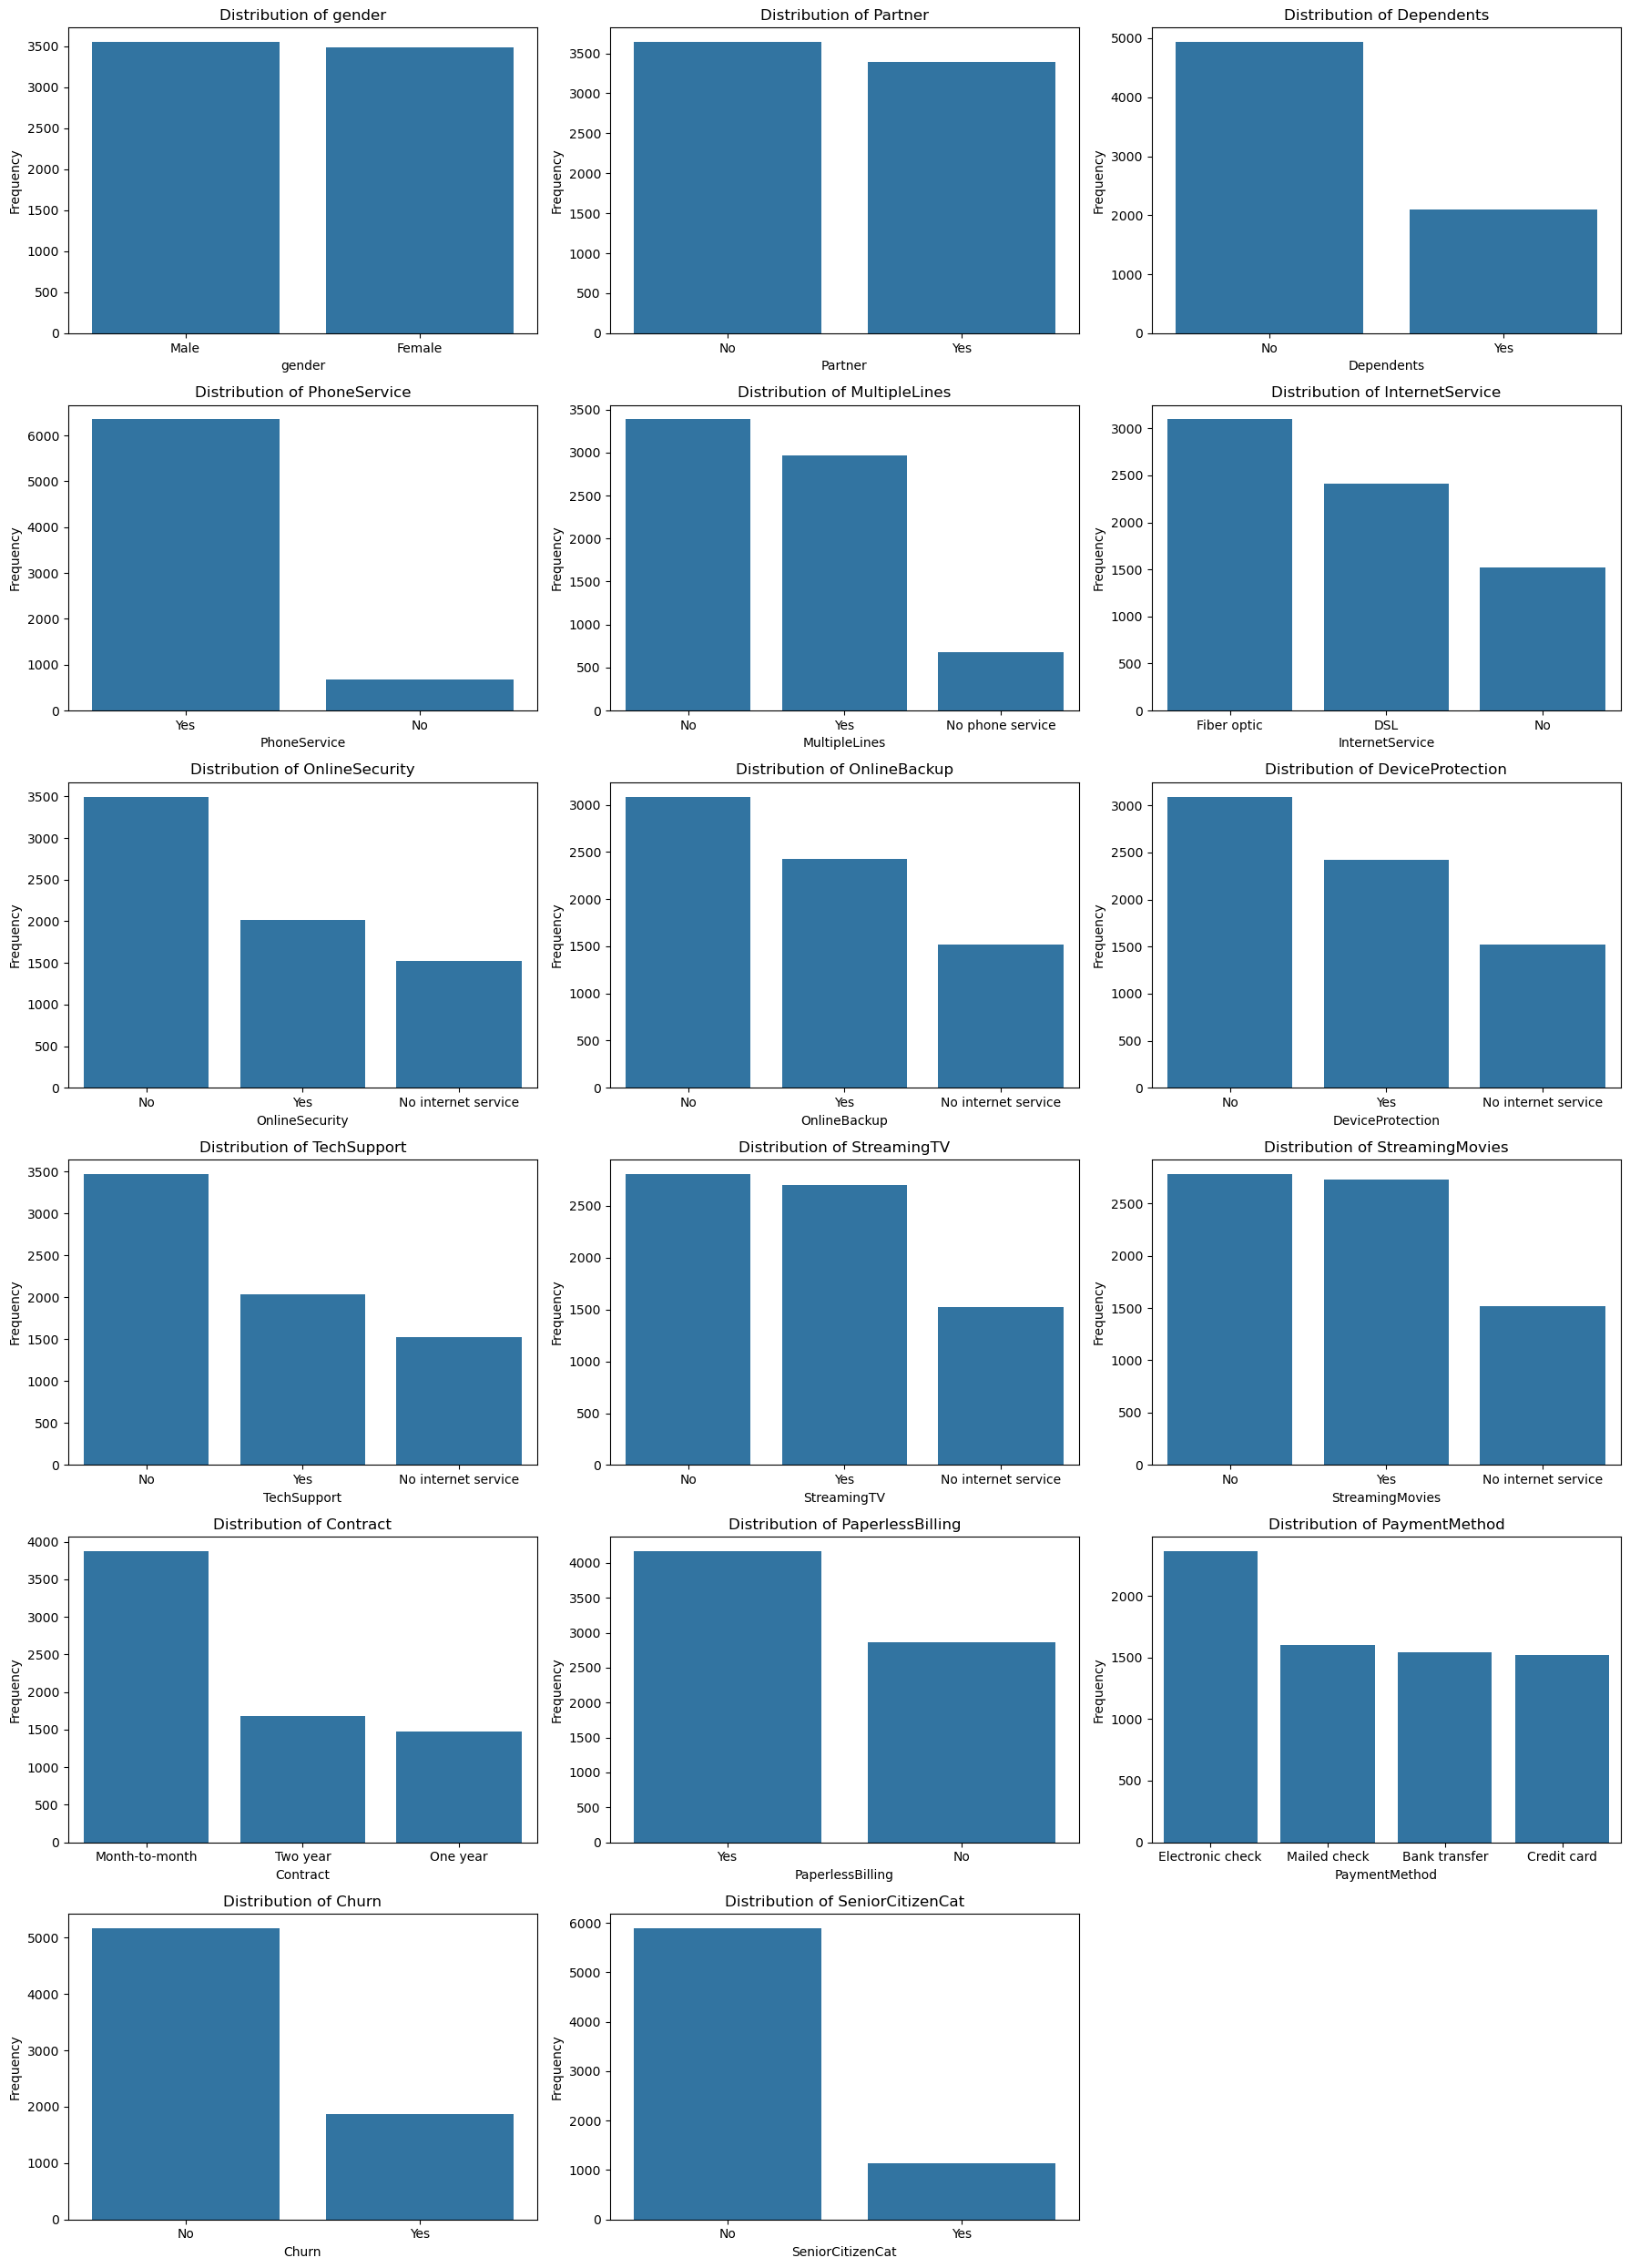

In [154]:
# Univariate analysis for categorical variables
plt.figure(figsize=(18,25)) # define figure size

for i, col in enumerate(cs_data[categorical_columns], 1):
    if col in categorical_columns:
        plt.subplot(6, 3, i)
        sns.countplot(x=col, data=cs_data[categorical_columns], order=cs_data[categorical_columns][col].value_counts().index)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Univariate analysis (numerical variables)

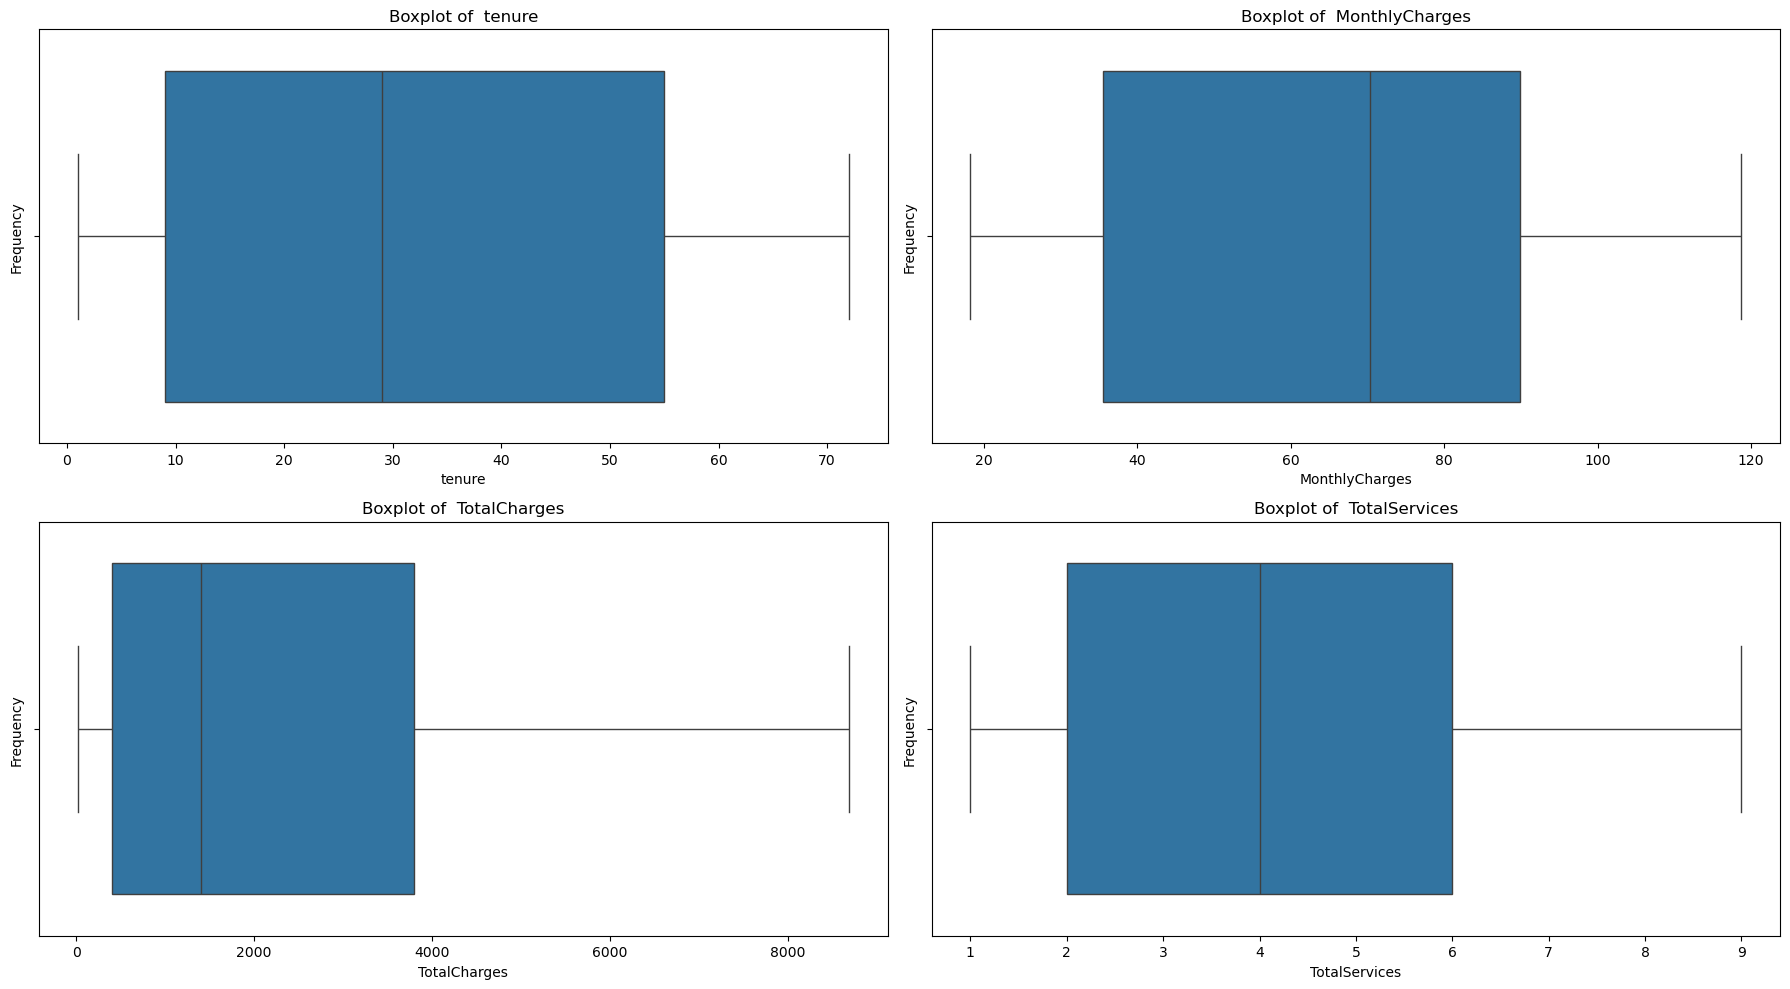

In [24]:
# Boxplots of numerical variables
plt.figure(figsize=(18,10)) # define figure size

for i, col in enumerate(cs_data[numerical_columns], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, data=cs_data[numerical_columns])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of  {col}')
plt.tight_layout()
plt.show()

### Summary of Univariate analysis (Categorical data)

My exploratory data analysis discovered key insights into customer demographics, service preferences, account types, and churn rates. The gender distribution is balanced, with most customers being non-senior citizens without dependents or partners, suggesting a trend towards individual or smaller households. Most customers have phone service, but fewer opt for multiple lines. Fiber optic is the preferred internet service. There is low adoption of additional services like online security and tech support, indicating potential areas for growth. Month-to-month contracts are the most popular, and paperless billing is preferred. The churn rate is low, with most customers retaining their services.

The tenure of customers ranges from 1 to 72 months, with a median of 30 months and a right-skewed distribution. Monthly charges vary between 18 and 119, with a median of 70 and a slight left skew. Total charges range from 18 to 8684, with a median of 2000 and a right-skewed distribution, indicating that a few customers have very high charges. Total services range from 1 to 9, with a median of 3 and discrete peaks. 

These insights reveal significant skewness in the numerical data, highlighting variability in customer tenure, charges, and service subscriptions.

#### Bivariate Analysis (Categorical Variables)

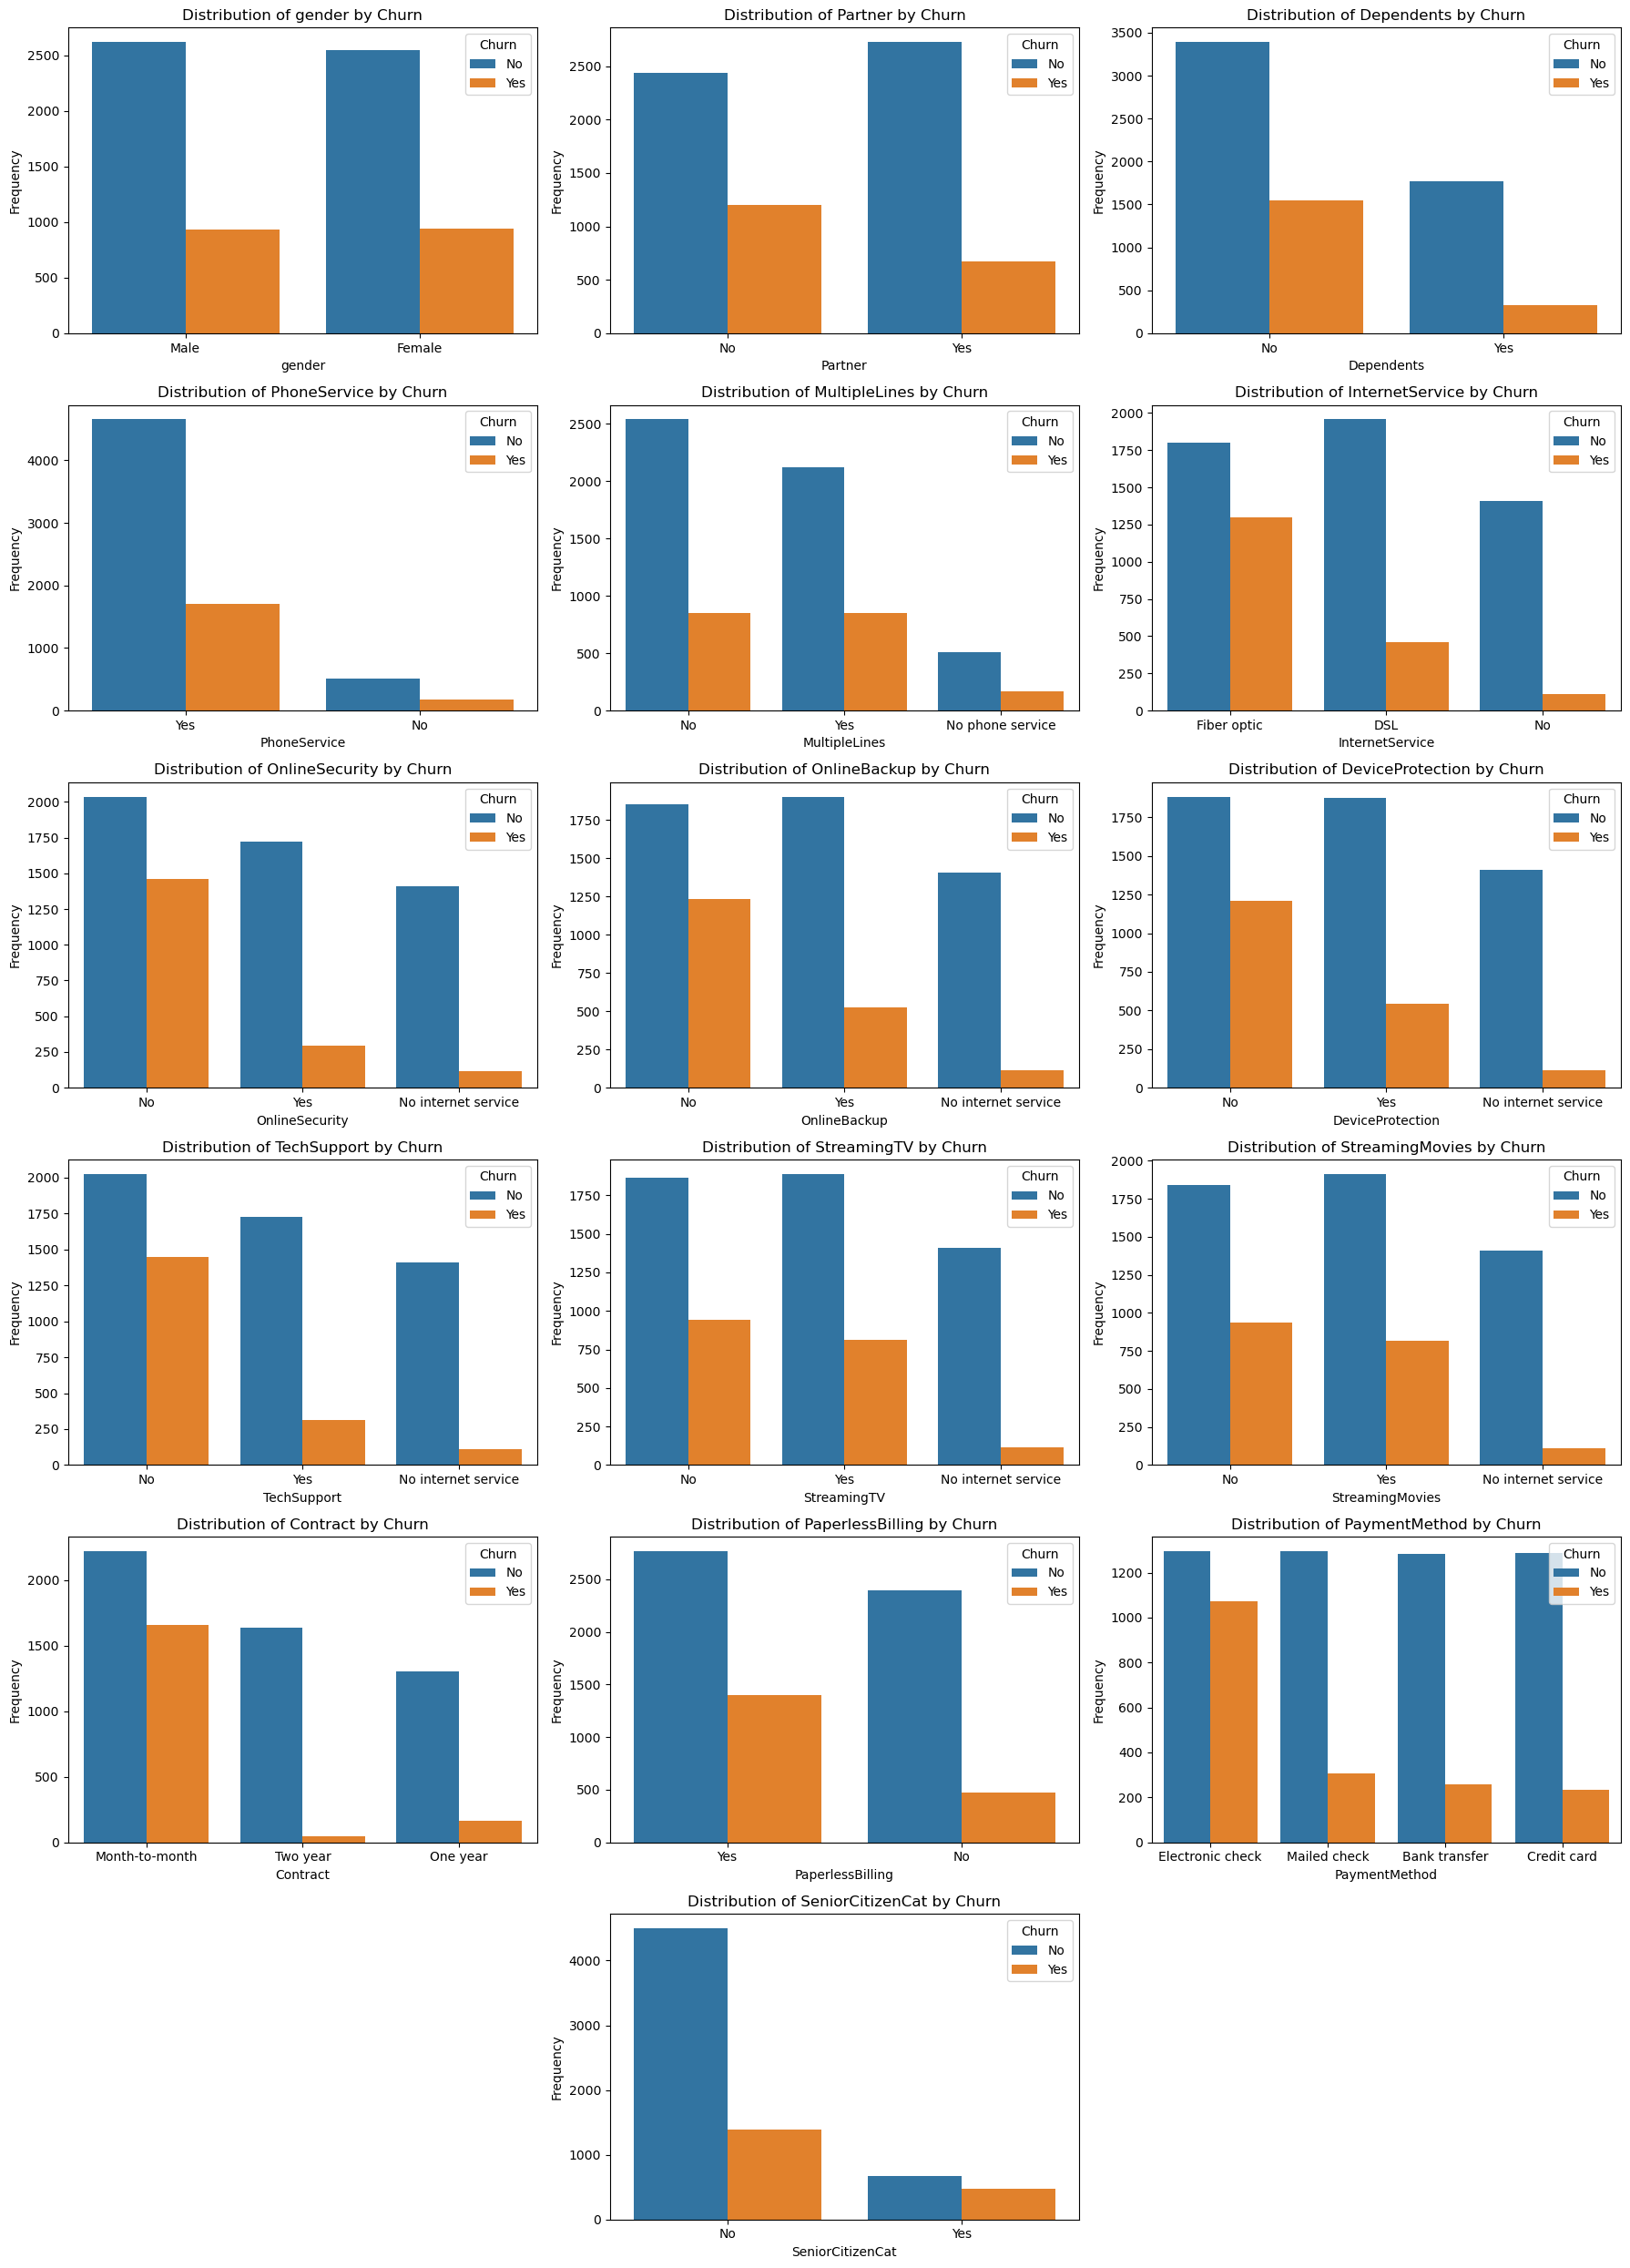

In [27]:
# Bivariate analysis for categorical variables with Churn label
plt.figure(figsize=(18,25)) # define figure size

for i, col in enumerate(cs_data[categorical_columns], 1):
    if col != 'Churn':
        plt.subplot(6, 3, i)
        sns.countplot(x=col, hue='Churn', data=cs_data[categorical_columns], order=cs_data[categorical_columns][col].value_counts().index)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col} by Churn')
        
plt.tight_layout()
plt.show()

### Bivariate analysis (numerical data) with Churn label

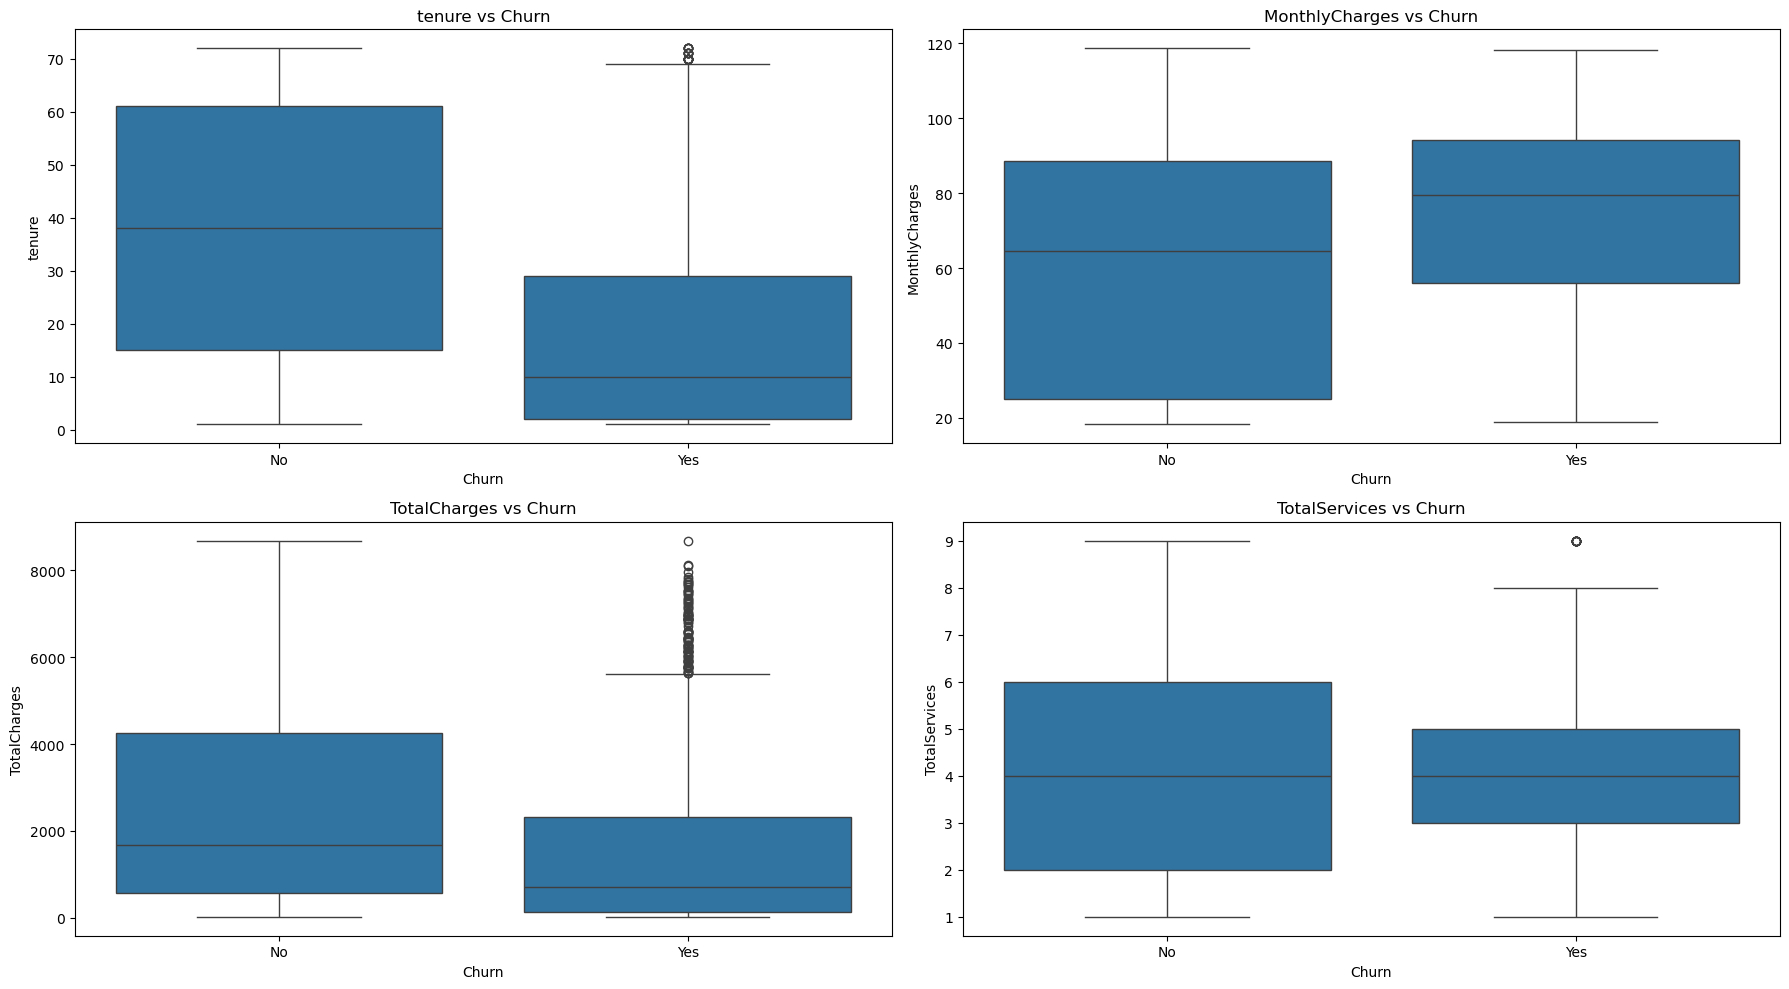

In [34]:
# boxplot of numerical variables by churn
plt.figure(figsize=(18,10)) # define figure size

# create a boxplot using a loop
for i, column in enumerate(cs_data[numerical_columns], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cs_data['Churn'], y=column, data=cs_data[numerical_columns])
    plt.title(f'{column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Bivariate analysis (feature to feature)

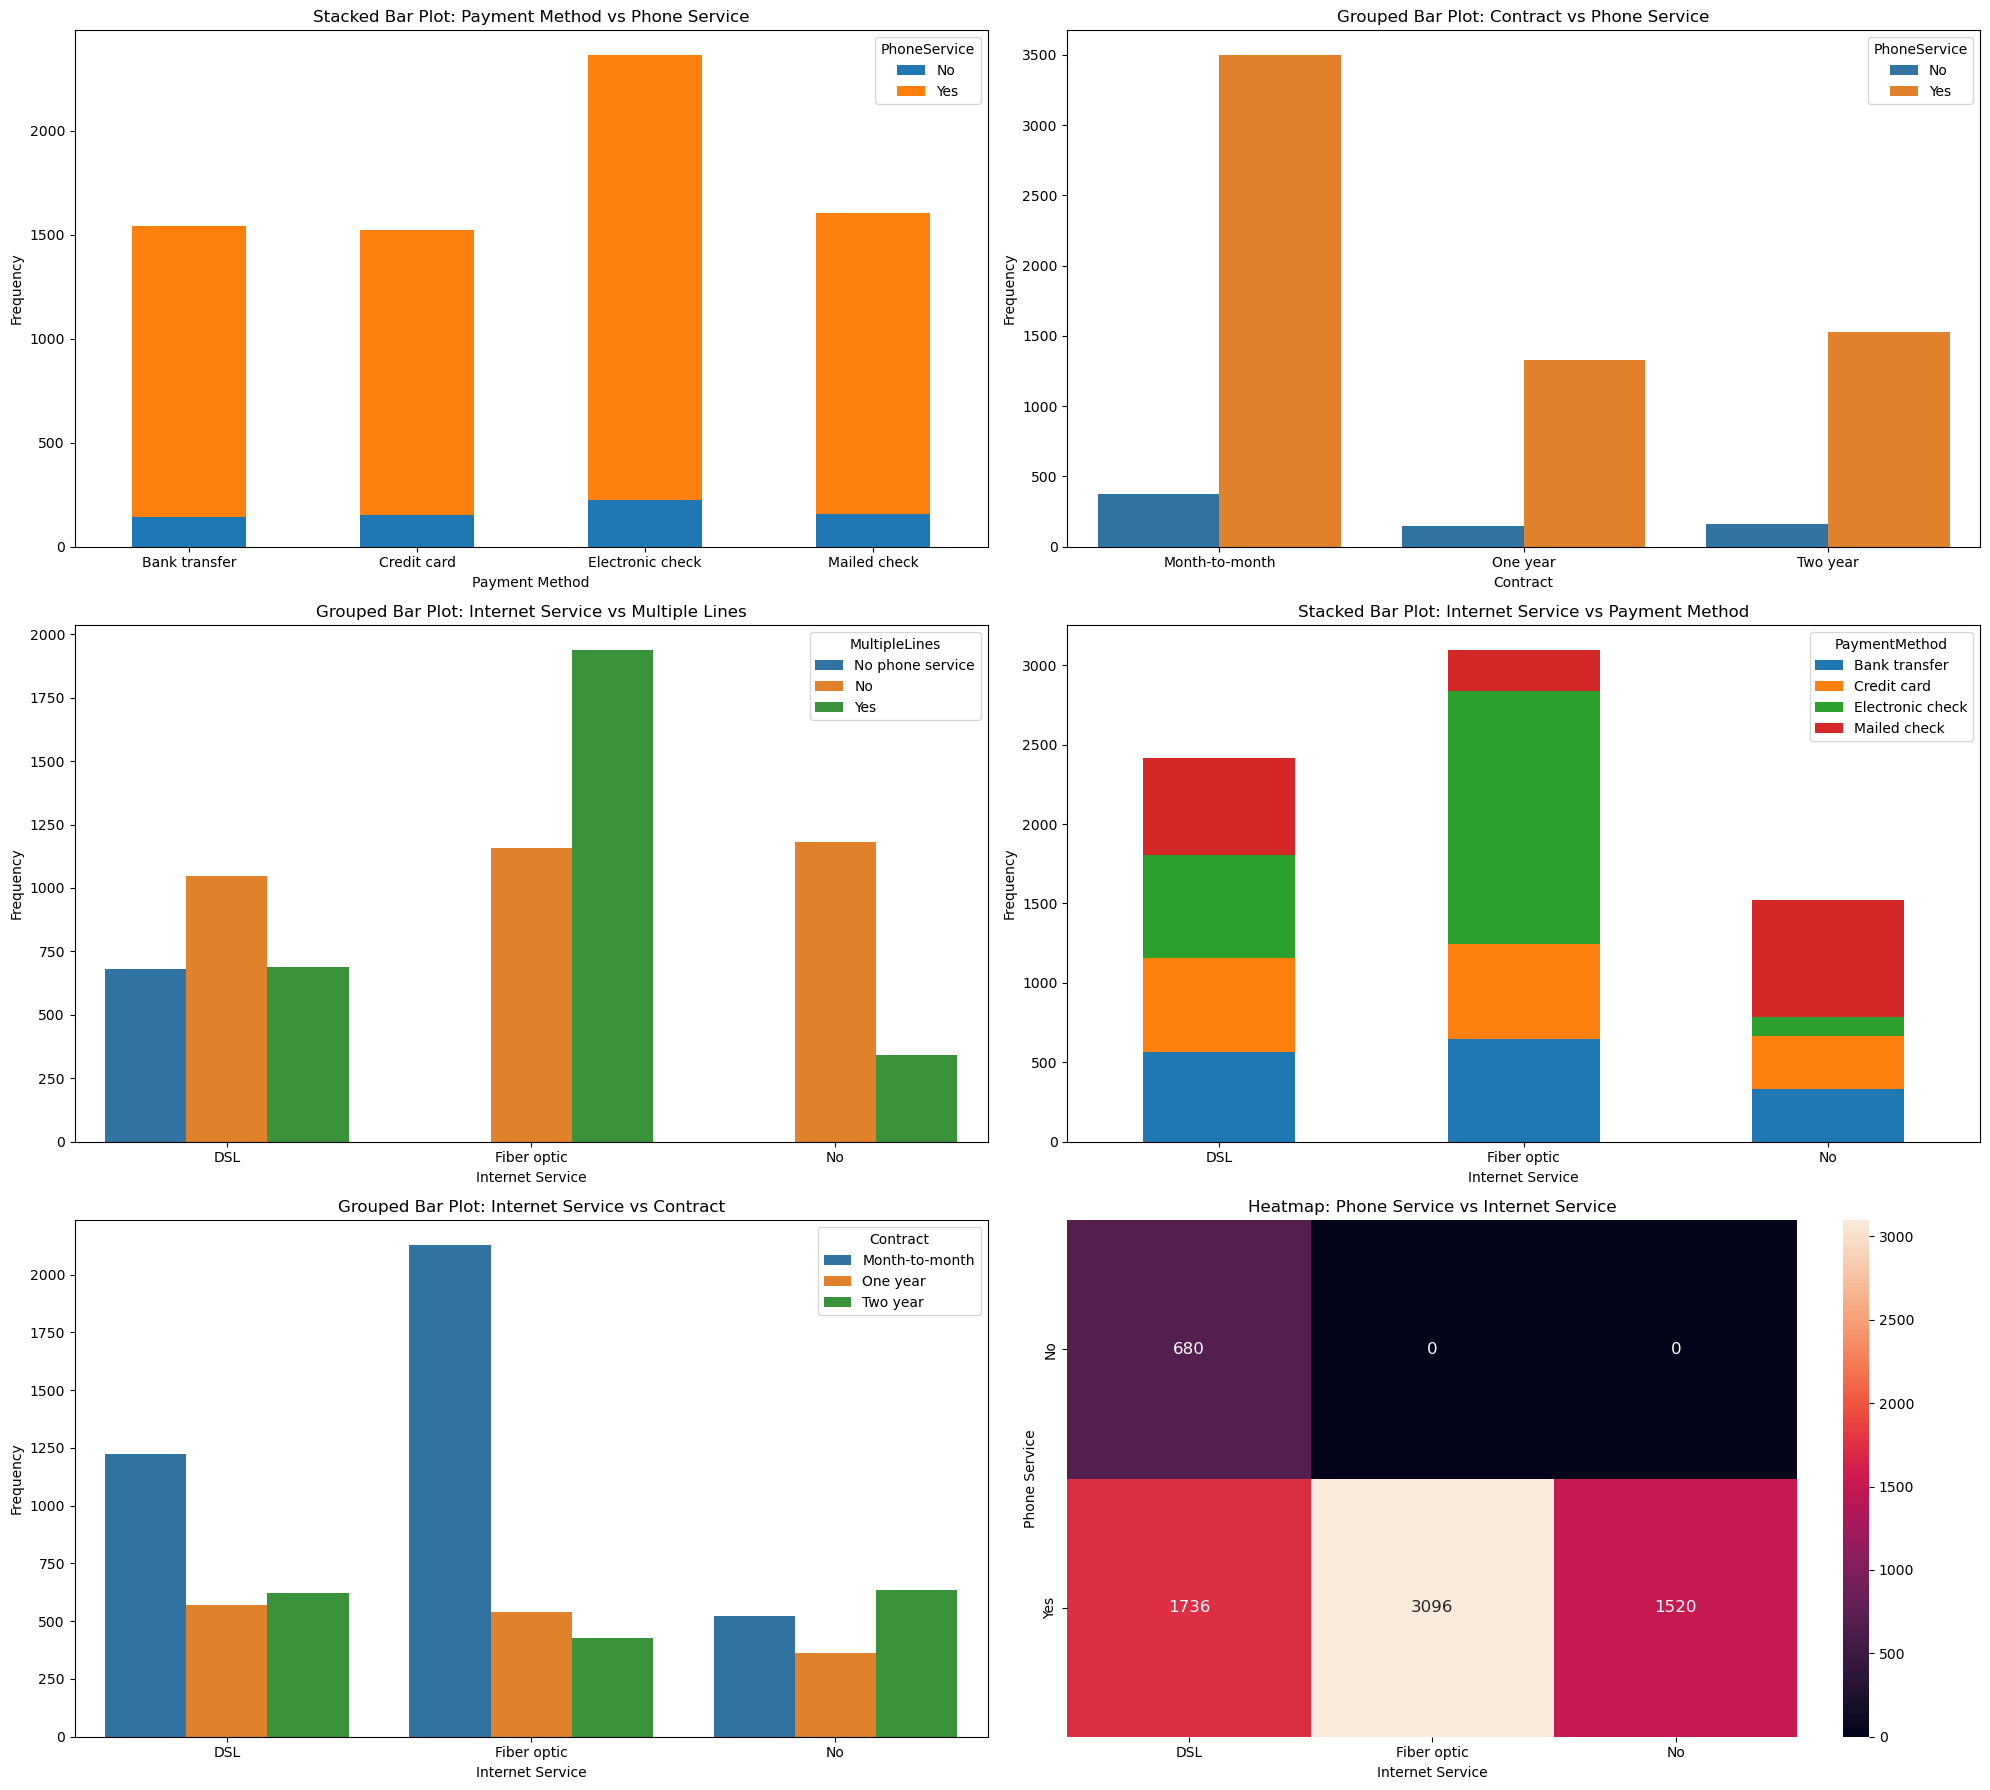

In [62]:
# Bivariate analysis
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Bivariate analysis - relationship between internet services and payment method
ct1 = pd.crosstab(cs_data['PaymentMethod'], cs_data['PhoneService'])
ct1.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Stacked Bar Plot: Payment Method vs Phone Service')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlabel('Payment Method')
axes[0, 0].set_xticks(axes[0, 0].get_xticks())
axes[0, 0].set_xticklabels(ct1.index, rotation=0)

# Bivariate analysis - relationship between internet services and multiple lines
sns.countplot(x='Contract', hue='PhoneService', data=cs_data, ax=axes[0, 1])
axes[0, 1].set_title('Grouped Bar Plot: Contract vs Phone Service')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlabel('Contract')

# Bivariate analysis - relationship between internet services and multiple lines
sns.countplot(x='InternetService', hue='MultipleLines', data=cs_data, ax=axes[1, 0])
axes[1, 0].set_title('Grouped Bar Plot: Internet Service vs Multiple Lines')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlabel('Internet Service')

# Bivariate analysis - relationship between internet services and payment method
ct2 = pd.crosstab(cs_data['InternetService'], cs_data['PaymentMethod'])
ct2.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Stacked Bar Plot: Internet Service vs Payment Method')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlabel('Internet Service')
axes[1, 1].set_xticks(axes[1, 1].get_xticks())
axes[1, 1].set_xticklabels(ct2.index, rotation=0)

# Bivariate analysis - relationship between internet services and contract
sns.countplot(x='InternetService', hue='Contract', data=cs_data, ax=axes[2, 0])
axes[2, 0].set_title('Grouped Bar Plot: Internet Service vs Contract')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlabel('Internet Service')

# Bivariate analysis - relationship between internet services and phone services
ct3 = pd.crosstab(cs_data['PhoneService'], cs_data['InternetService'])
sns.heatmap(ct3, annot=True, fmt='d', annot_kws={"size": 12}, ax=axes[2, 1])
axes[2, 1].set_title('Heatmap: Phone Service vs Internet Service')
axes[2, 1].set_ylabel('Phone Service')
axes[2, 1].set_xlabel('Internet Service')

plt.tight_layout()
plt.show()

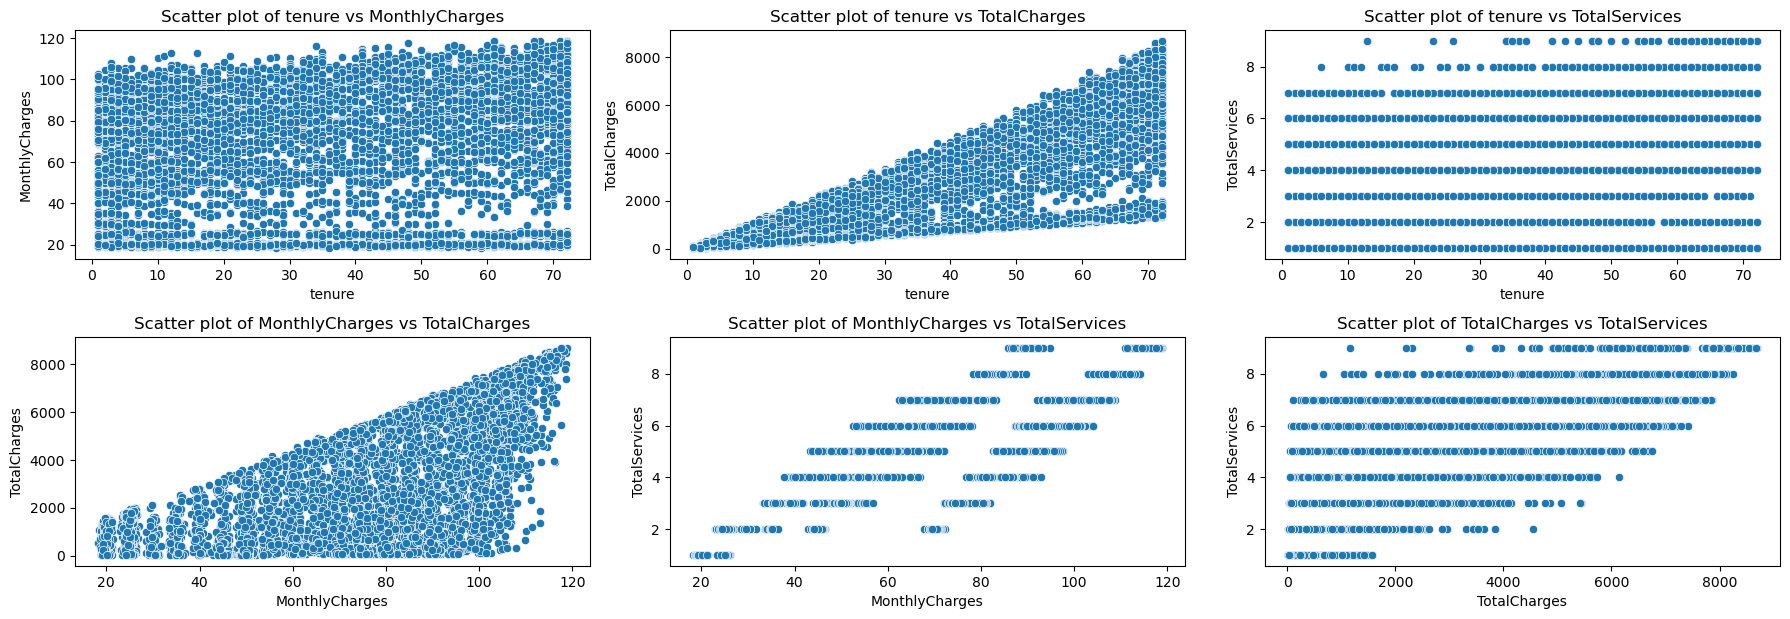

In [28]:
# Bivariate analysis for numerical variables
# Define figure size
plt.figure(figsize=(18, 12)) 

# Get the column names
col_names = cs_data[numerical_columns].columns

# Initialize a plot counter
plot_number = 1

# Loop through each pair of columns in the dataframe
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):
        # Create a subplot for each pair of columns
        plt.subplot(len(col_names), len(col_names) - 1, plot_number)
        
        # Create a scatter plot for the current pair of columns
        sns.scatterplot(x=cs_data[col_names[i]], y=cs_data[col_names[j]])
        
        # Set the x-axis label to the name of the current x-column
        plt.xlabel(col_names[i])
        
        # Set the y-axis label to the name of the current y-column
        plt.ylabel(col_names[j])
        
        # Set the title of the subplot to 'Scatter plot of {x-column} vs {y-column}'
        plt.title(f'Scatter plot of {col_names[i]} vs {col_names[j]}')
        
        # Increment the plot counter
        plot_number += 1

plt.tight_layout()
plt.show()

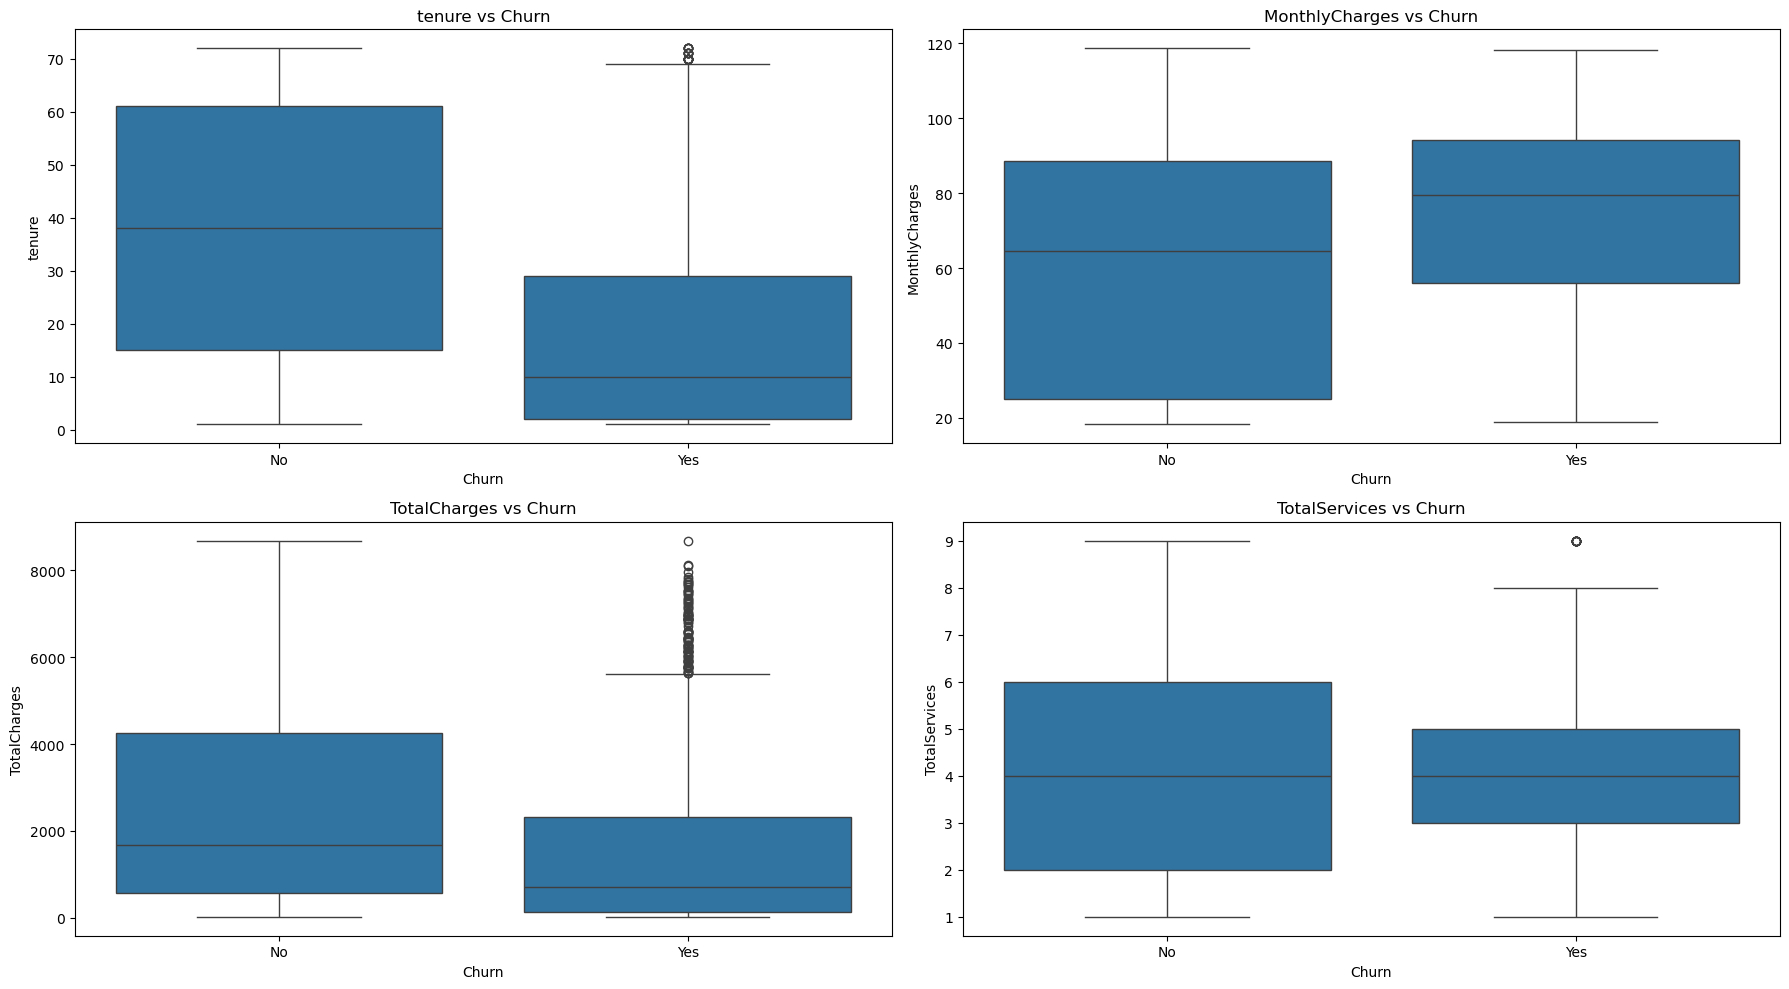

In [33]:
# boxplot of numerical variables by churn
plt.figure(figsize=(18,10)) # define figure size

# create a boxplot using a loop
for i, column in enumerate(cs_data[numerical_columns], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cs_data['Churn'], y=column, data=cs_data[numerical_columns])
    plt.title(f'{column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Summary of Bivariate analysis

I analysed various categorical and numerical variables related to customer churn target, and the key findings include:

- **Demographics:** Senior citizens and customers without partners or dependents have higher churn rates, while gender shows no significant impact.
- **Services:**
  - **Phone Service:** No significant churn difference based on phone service alone.
  - **Internet Service:** Fiber optic customers churn more than DSL or non-internet users.
  - **Add-ons:** Absence of services like online security and streaming increases churn.
  - **Contract:** Monthly contracts lead to higher churn compared to longer contracts.
  - **Billing:** Paperless billing and electronic check payments correlate with higher churn.
- **Tenure vs. Churn**: Customers with shorter tenures are more likely to churn than those with longer tenures.
- **Monthly Charges vs. Churn**: Higher monthly charges are associated with higher churn rates, suggesting cost is a driving factor for churn.
- **Total Charges vs. Churn**: There is no significant difference, but higher total charges may relate to accumulated costs over time, influencing churn.
- **Total Services vs. Churn**: Fewer total services correlate with higher churn, although this factor is less significant.

An analysis of the relationships between numerical variables revealed the following insights:

- **Tenure vs. MonthlyCharges:** No clear linear relationship exists with a dispersed pattern.
- **Tenure vs. TotalCharges:** A positive correlation is observed; although not perfectly linear, tenure increases as total charges increase.
- **Tenure vs. TotalServices:** There is a slight upward trend that suggests longer tenures may involve more services, but the relationship is weak.
- **MonthlyCharges vs. TotalCharges:** There is a strong positive linear correlation; higher monthly charges lead to higher total charges.
- **MonthlyCharges vs. TotalServices:** No strong relationship with a dispersed pattern is observed.
- **TotalCharges vs. TotalServices:** Some clustering is noted, but no strong linear relationship.


Overall, factors such as age, relationship status, internet service type, monthly charges and contract length significantly impact customer churn, with longer tenure reducing churn rates.


### Multivariate Analysis

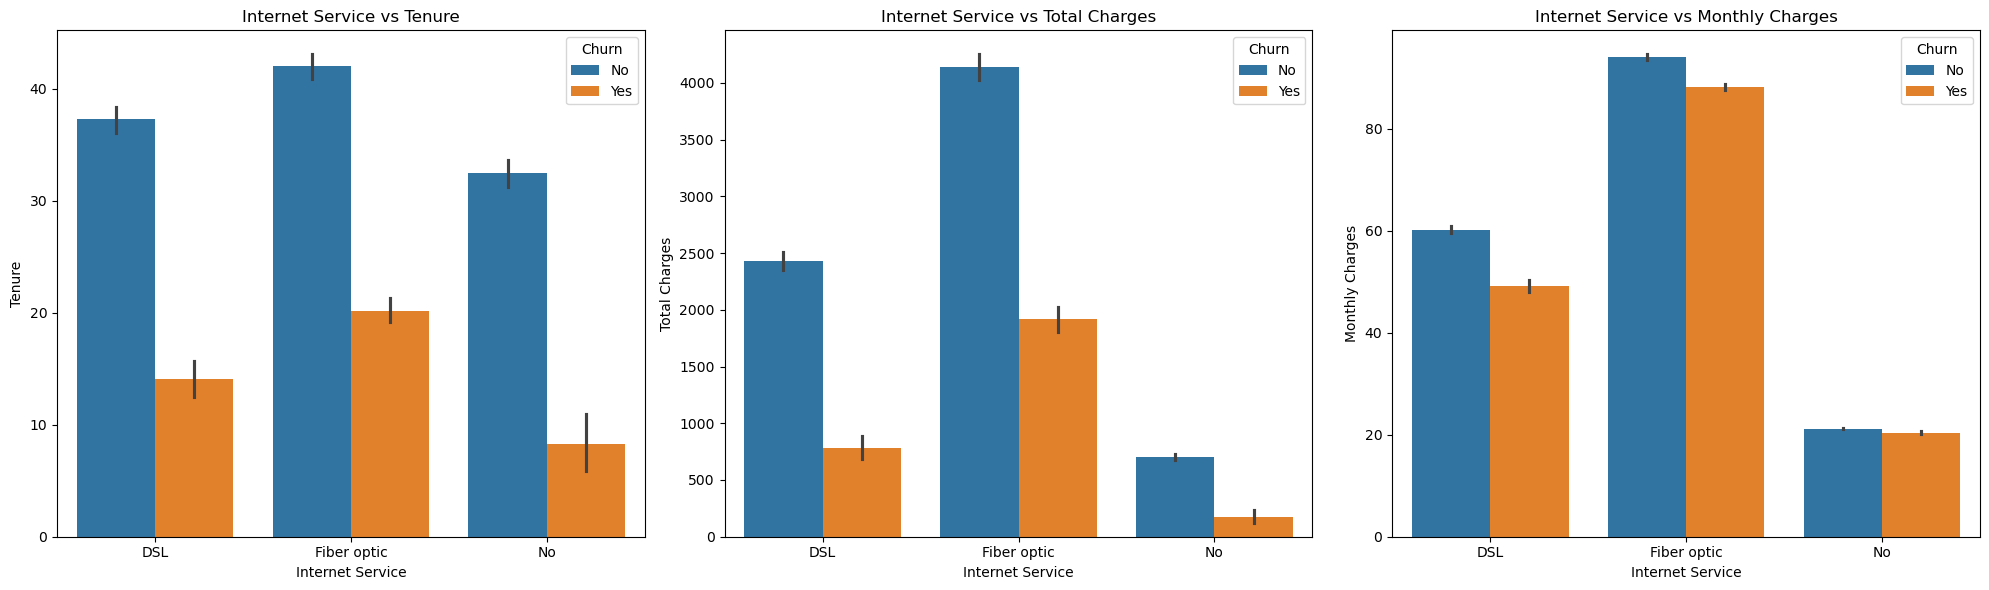

In [66]:
# Multivariate analysis in Internet Service vs Tenure on Churn label
# Define the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: InternetService vs Tenure
sns.barplot(x='InternetService', y='tenure', hue='Churn', data=cs_data, ax=axes[0])
axes[0].set_xlabel('Internet Service')
axes[0].set_ylabel('Tenure')
axes[0].set_title('Internet Service vs Tenure')

# Plot 2: InternetService vs TotalCharges
sns.barplot(x='InternetService', y='TotalCharges', hue='Churn', data=cs_data, ax=axes[1])
axes[1].set_xlabel('Internet Service')
axes[1].set_ylabel('Total Charges')
axes[1].set_title('Internet Service vs Total Charges')

# Plot 3: InternetService vs MonthlyCharges
sns.barplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=cs_data, ax=axes[2])
axes[2].set_xlabel('Internet Service')
axes[2].set_ylabel('Monthly Charges')
axes[2].set_title('Internet Service vs Monthly Charges')

plt.tight_layout()
plt.show()

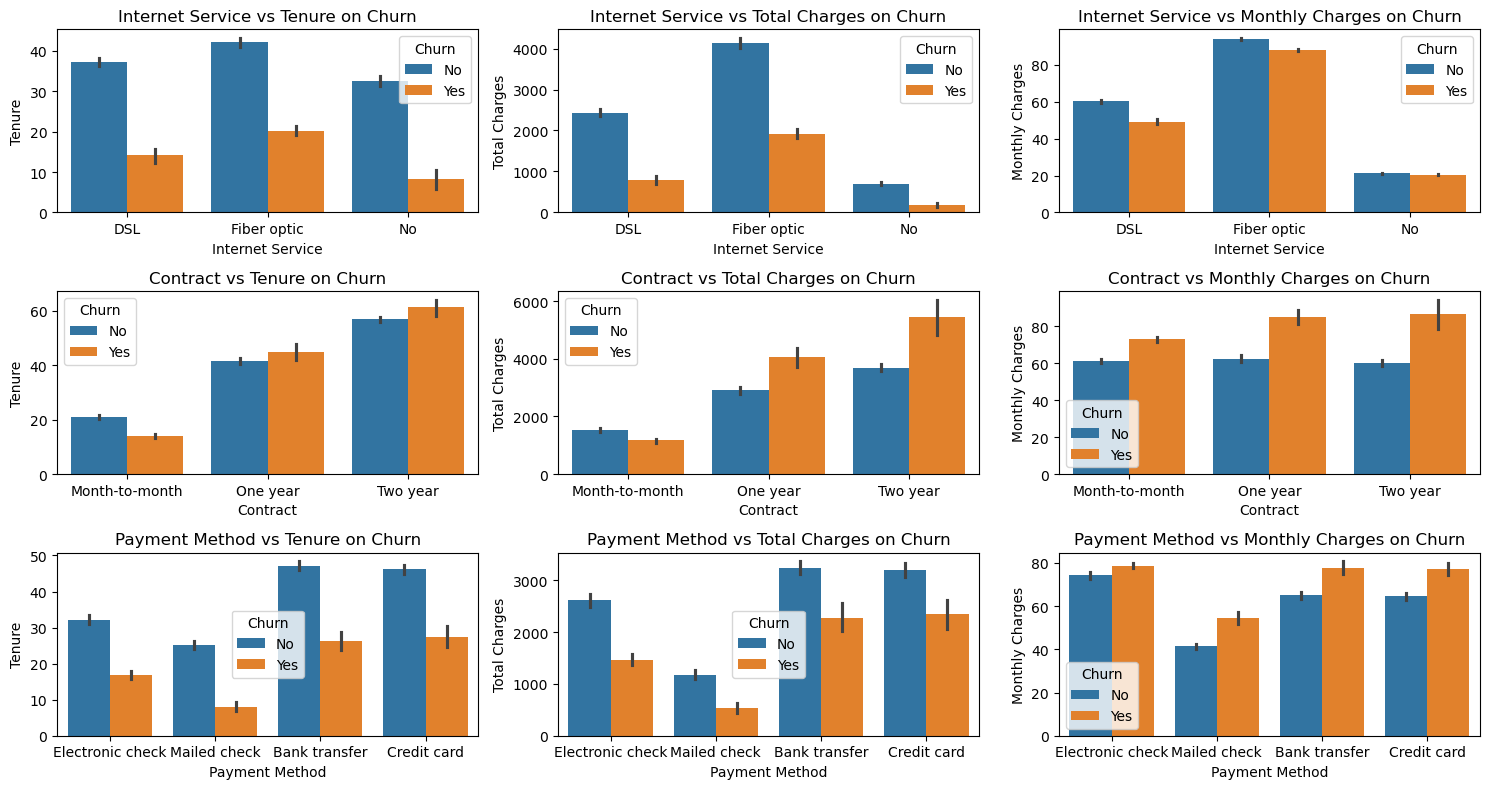

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Internet Service vs Tenure
sns.barplot(x='InternetService', y='tenure', hue='Churn', data=cs_data, ax=axes[0,0])
axes[0,0].set_xlabel('Internet Service')
axes[0,0].set_ylabel('Tenure')
axes[0,0].set_title('Internet Service vs Tenure on Churn')
# Internet Service vs Total Charges
sns.barplot(x='InternetService', y='TotalCharges', hue='Churn', data=cs_data, ax=axes[0,1])
axes[0,1].set_xlabel('Internet Service')
axes[0,1].set_ylabel('Total Charges')
axes[0,1].set_title('Internet Service vs Total Charges on Churn')
# Internet Service vs Monthly Charges
sns.barplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=cs_data, ax=axes[0,2])
axes[0,2].set_xlabel('Internet Service')
axes[0,2].set_ylabel('Monthly Charges')
axes[0,2].set_title('Internet Service vs Monthly Charges on Churn')
# Contract vs Tenure
sns.barplot(x='Contract', y='tenure', hue='Churn', data=cs_data, ax=axes[1,0])
axes[1,0].set_xlabel('Contract')
axes[1,0].set_ylabel('Tenure')
axes[1,0].set_title('Contract vs Tenure on Churn')
# Contract vs Total Charges
sns.barplot(x='Contract', y='TotalCharges', hue='Churn', data=cs_data, ax=axes[1,1])
axes[1,1].set_xlabel('Contract')
axes[1,1].set_ylabel('Total Charges')
axes[1,1].set_title('Contract vs Total Charges on Churn')
# Contract vs MonthlyC harges
sns.barplot(x='Contract', y='MonthlyCharges', hue='Churn', data=cs_data, ax=axes[1,2])
axes[1,2].set_xlabel('Contract')
axes[1,2].set_ylabel('Monthly Charges')
axes[1,2].set_title('Contract vs Monthly Charges on Churn')
# Payment Method vs Tenure on Churn
sns.barplot(x='PaymentMethod', y='tenure', hue='Churn', data=cs_data, ax=axes[2,0])
axes[2,0].set_xlabel('Payment Method')
axes[2,0].set_ylabel('Tenure')
axes[2,0].set_title('Payment Method vs Tenure on Churn')
# Payment Method vs Total Charges on Churn
sns.barplot(x='PaymentMethod', y='TotalCharges', hue='Churn', data=cs_data, ax=axes[2,1])
axes[2,1].set_xlabel('Payment Method')
axes[2,1].set_ylabel('Total Charges')
axes[2,1].set_title('Payment Method vs Total Charges on Churn')
# Payment Method vs Monthly Charges on Churn
sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=cs_data, ax=axes[2,2])
axes[2,2].set_xlabel('Payment Method')
axes[2,2].set_ylabel('Monthly Charges')
axes[2,2].set_title('Payment Method vs Monthly Charges on Churn')
plt.tight_layout()
plt.show()

#### Multivariate analysis for numerical variables with Churn label

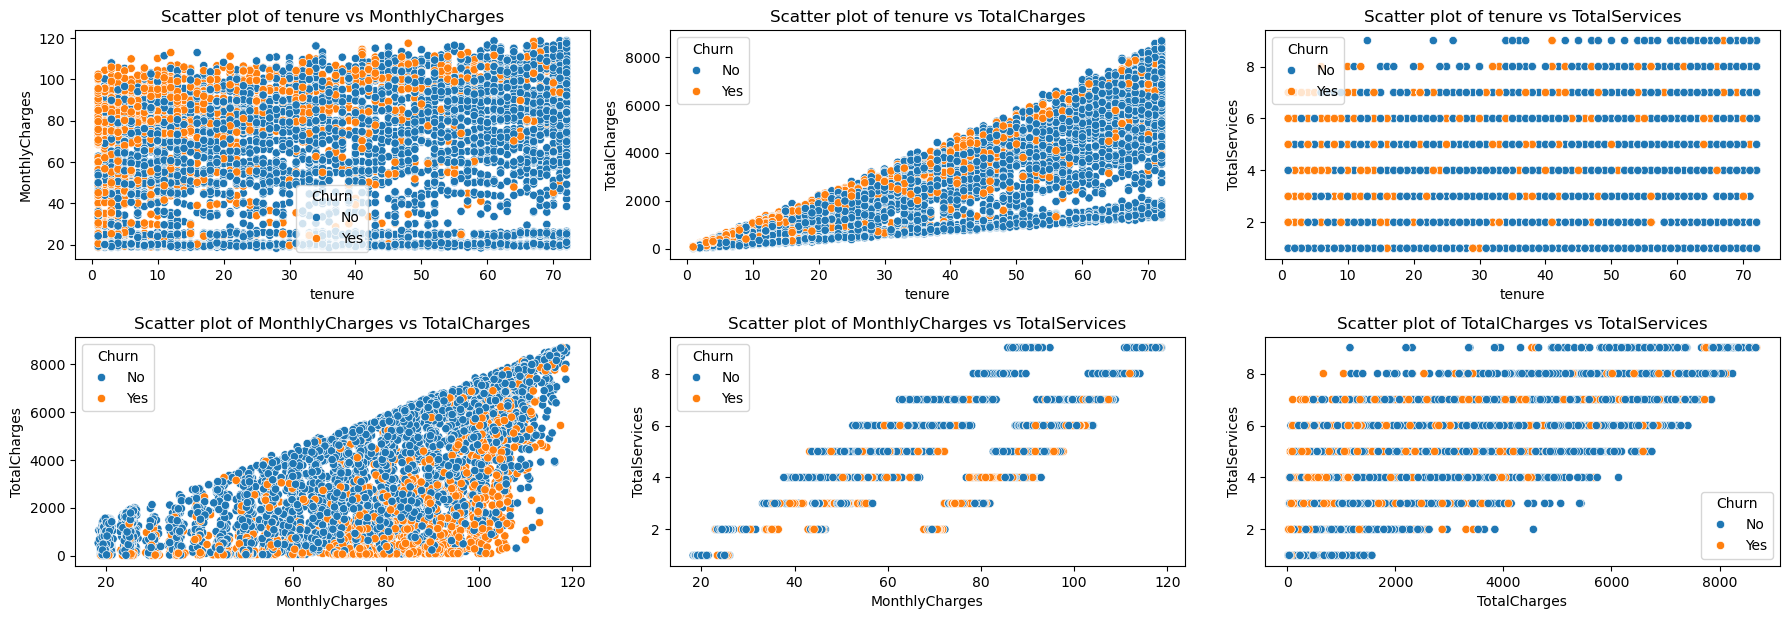

In [69]:
# Define figure size
plt.figure(figsize=(18, 12)) 

# Get the column names
col_names = cs_data[numerical_columns].columns

# Initialize a plot counter
plot_number = 1

# Loop through each pair of columns in the dataframe
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):
        # Create a subplot for each pair of columns
        plt.subplot(len(col_names), len(col_names) - 1, plot_number)
        
        # Create a scatter plot for the current pair of columns
        sns.scatterplot(x=cs_data[col_names[i]], y=cs_data[col_names[j]], hue=cs_data['Churn'])
        
        # Set the x-axis label to the name of the current x-column
        plt.xlabel(col_names[i])
        
        # Set the y-axis label to the name of the current y-column
        plt.ylabel(col_names[j])
        
        # Set the title of the subplot to 'Scatter plot of {x-column} vs {y-column}'
        plt.title(f'Scatter plot of {col_names[i]} vs {col_names[j]}')
        
        # Increment the plot counter
        plot_number += 1

plt.tight_layout()
plt.show()

### Summary of Multivariate Analysis (numerical variable vs churn)
The multivariate analysis reveals that customer churn is higher among those with shorter tenures, higher monthly charges, and fewer services. Customers with lower total charges and fewer services also exhibit higher churn rates. A linear relationship exists between monthly and total charges, with higher churn rates for those with high monthly but low total charges. Customers with higher monthly charges and fewer services are most prone to churn

#### Relationship between Tenure, Contract Type, and Churn

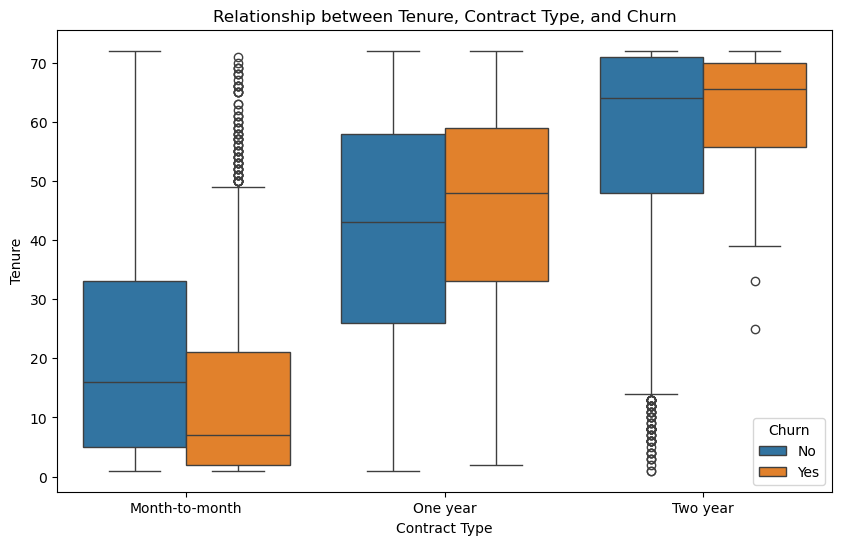

In [71]:
# Create a plot showing the relationship between Tenure, Contract Type, and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=cs_data)
plt.title('Relationship between Tenure, Contract Type, and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.legend(title='Churn')
plt.show()

#### Summary of the Relationship between Tenure, Contract Type, and Churn
Month-to-month contracts show high churn and shorter tenures. One-year contracts have more consistent tenures and lower churn. Two-year contracts demonstrate the longest tenures and lowest churn rates, indicating better retention. Short-term tenures are associated with higher churn, while longer tenures correlate with lower churn, particularly in longer contracts.

#### Comparing Internet Service and Payment Method on Churn

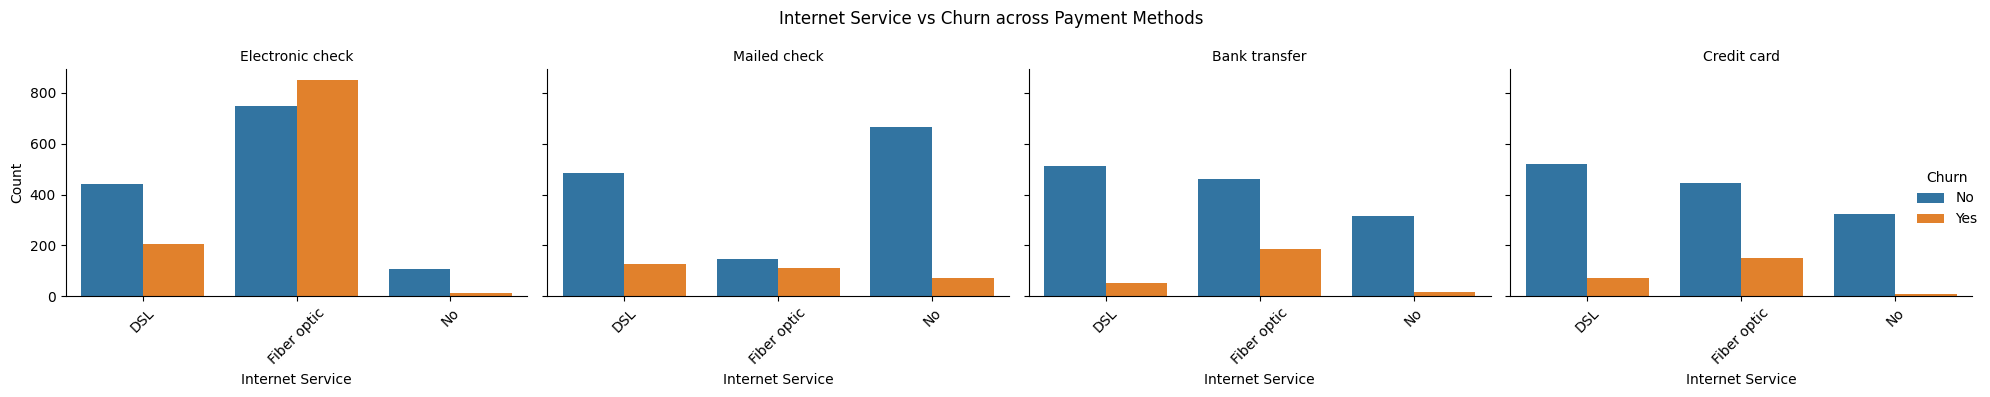

In [64]:
# Comparing Internet Service and Payment Method on Churn
g = sns.catplot(data=cs_data, x='InternetService', hue='Churn', col='PaymentMethod', kind='count', height=4, aspect=1.2)
g.set_titles("{col_name}")
g.set_axis_labels("Internet Service", "Count")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Internet Service vs Churn across Payment Methods')
plt.tight_layout()
plt.show()

#### Comparing Internet Service and Payment Method on Churn
Customers using Fiber optic internet service and paying via electronic check have the highest churn rate. DSL users also exhibit notable churn, particularly with electronic check payments, but less so than Fiber optic users. Those paying via mailed check, bank transfer, or credit card generally show lower churn rates. The interaction between internet service type and payment method significantly influences churn, with Fiber optic users using electronic checks being the most prone to churn.

#### Comparing InternetService and TotalCharges on Churn

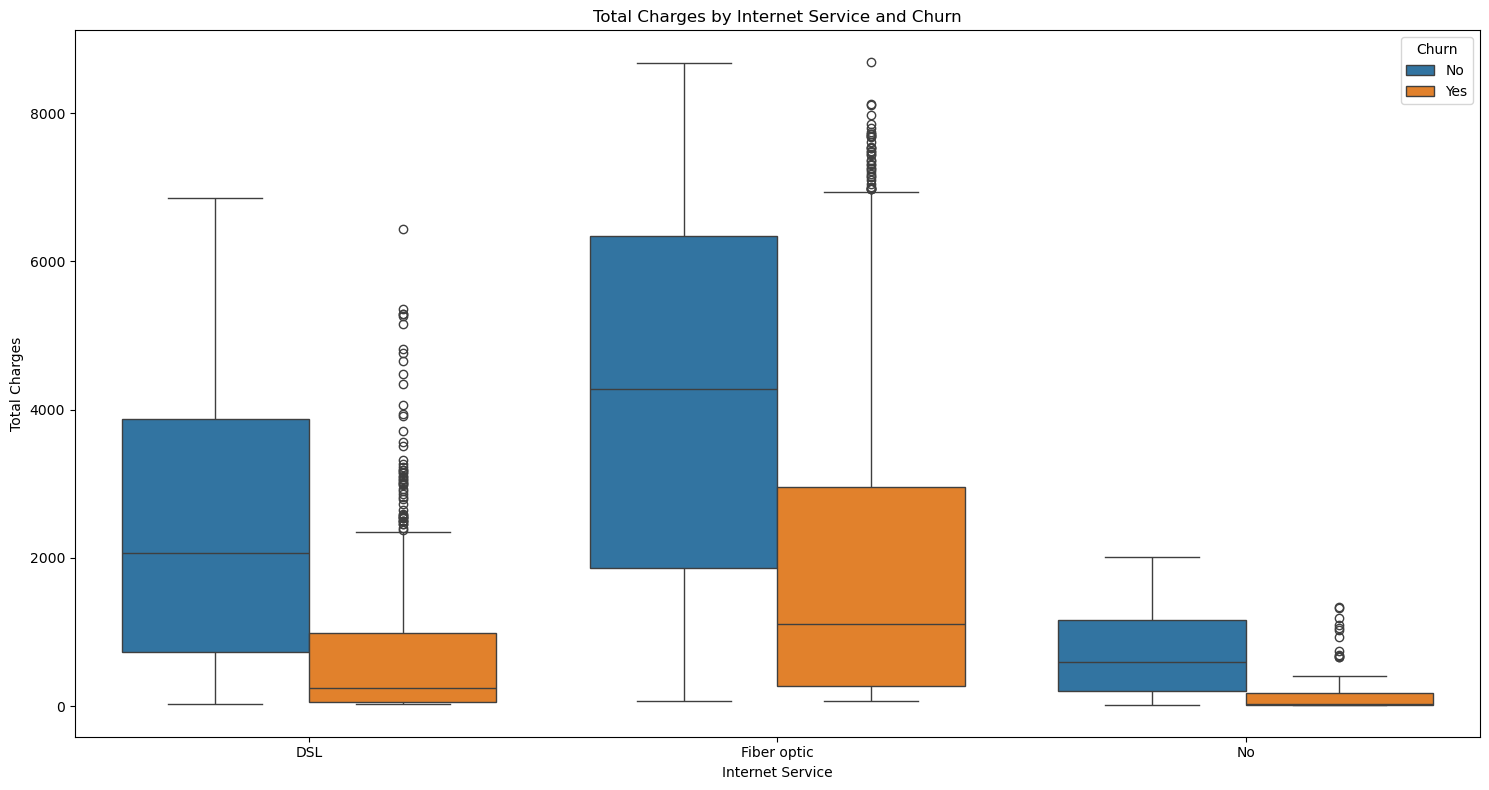

In [72]:
# Comparing InternetService and TotalCharges on Churn
plt.figure(figsize=(15, 8))

sns.boxplot(x='InternetService', y='TotalCharges', hue='Churn', data=cs_data)
plt.title('Total Charges by Internet Service and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Total Charges')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

#### Comparing Internet Service and Total Charges on Churn
Customers with DSL and lower total charges tend to churn, while fiber optic customers have higher total charges overall. Customers without internet service have the lowest, most uniform charges, with fewer instances of churn. Notably, the difference in total charges between churned and non-churned customers is more significant for fiber optic service than DSL.

#### Relationships between multiple variables (Contract, PaymentMethod, PaperlessBilling and Churn)

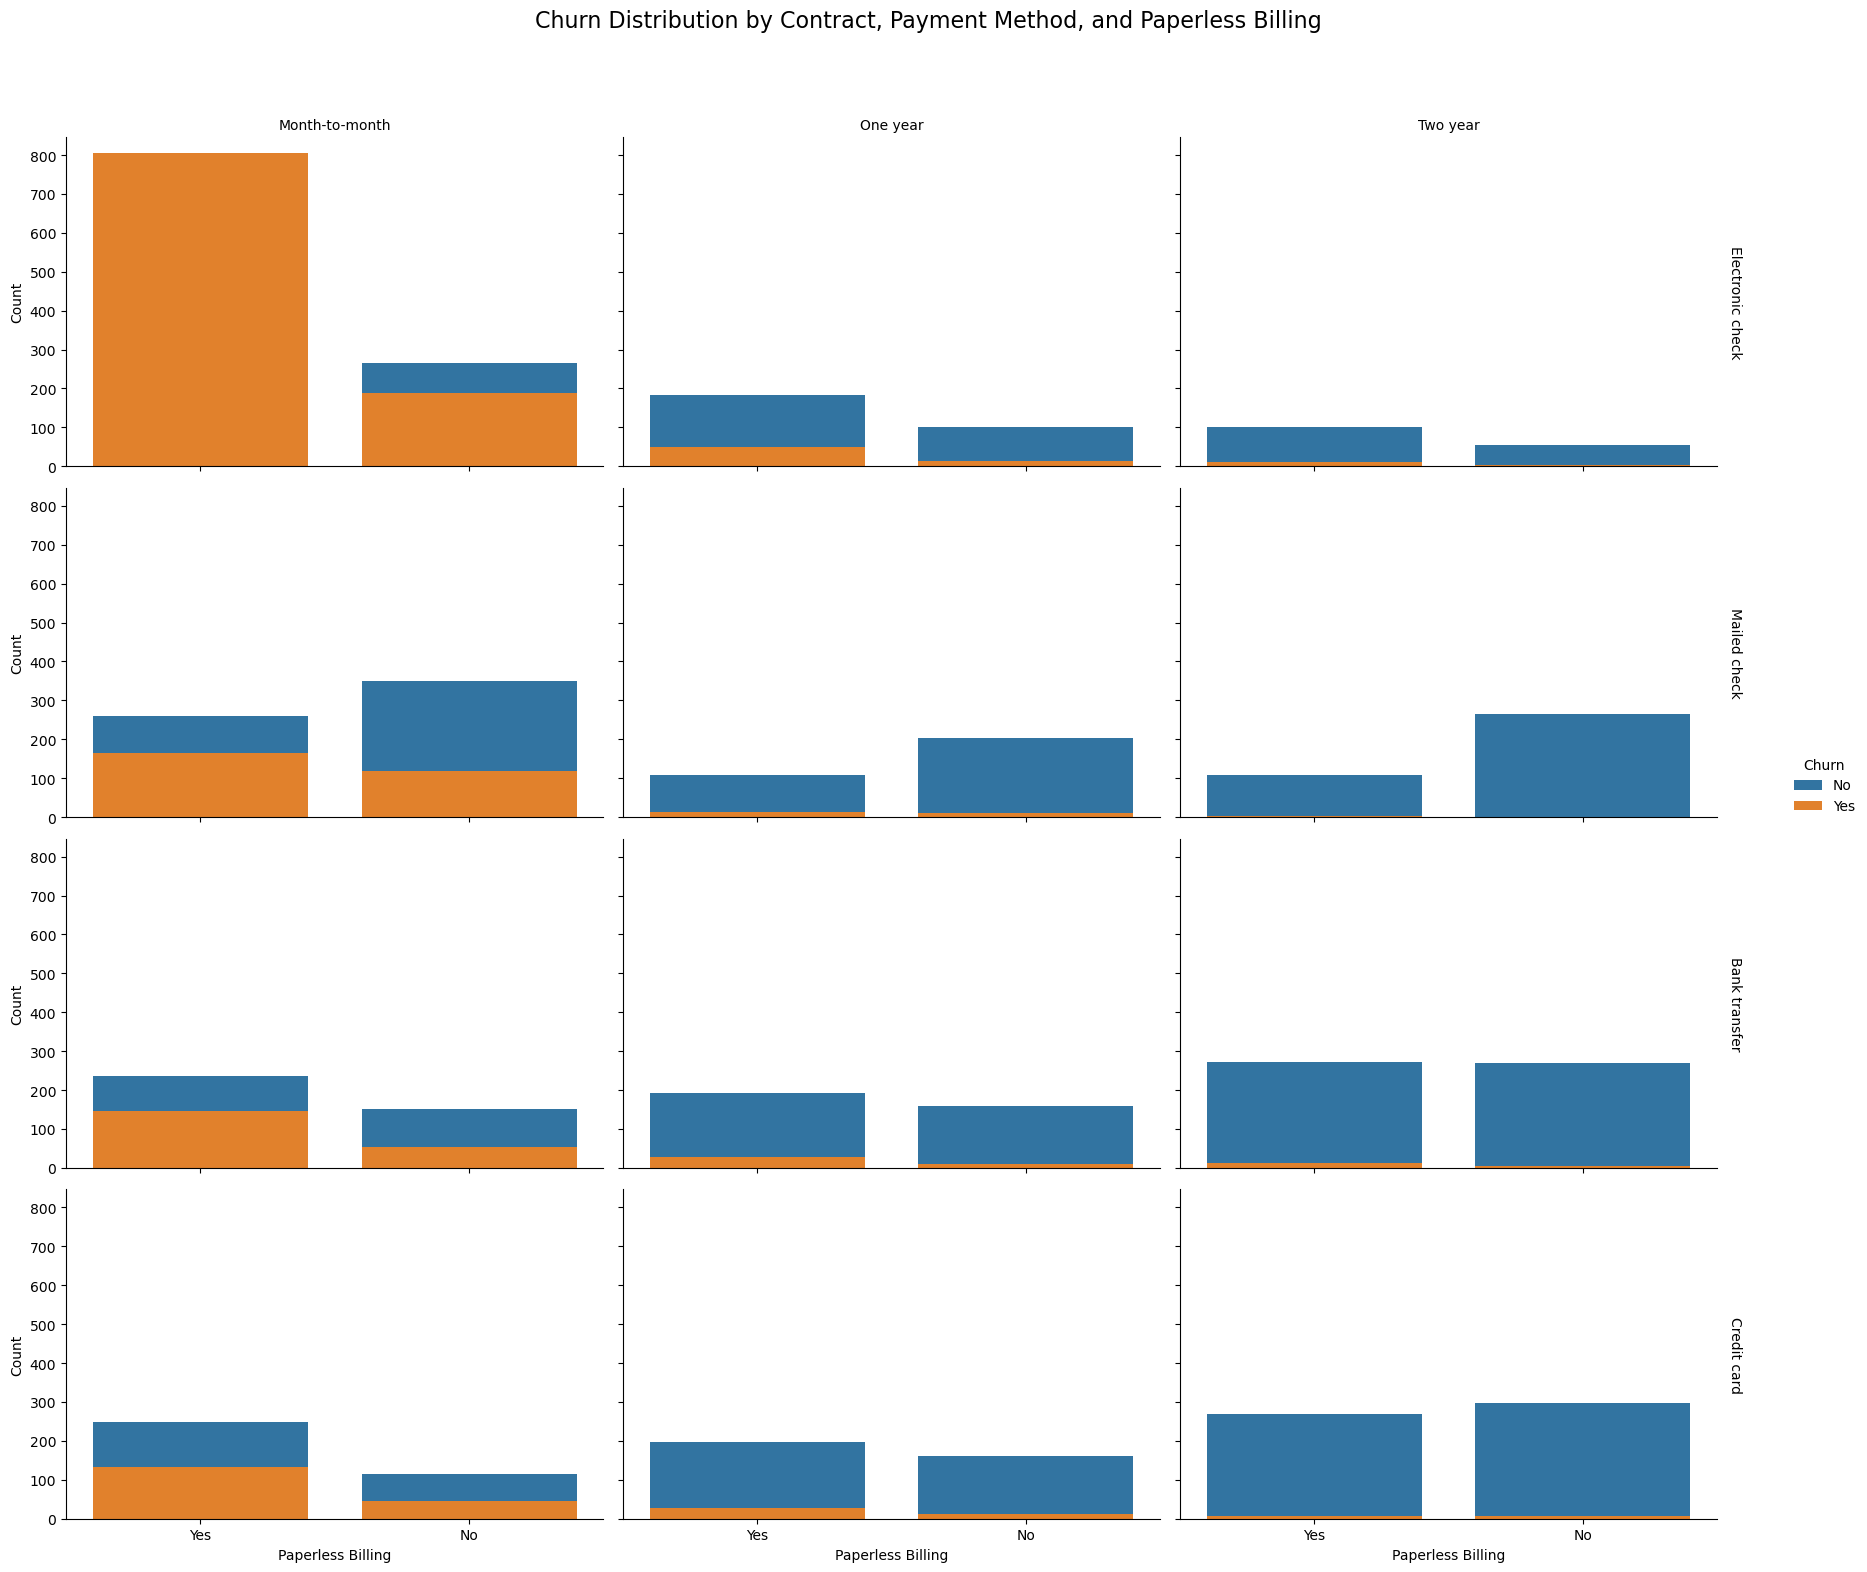

In [73]:
# Analysing relationships between multiple variables (Contract, PaymentMethod, PaperlessBilling and Churn)
g = sns.FacetGrid(cs_data, col="Contract", row="PaymentMethod", hue="Churn", margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.countplot, x="PaperlessBilling")
g.add_legend()
g.set_axis_labels("Paperless Billing", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Churn Distribution by Contract, Payment Method, and Paperless Billing', fontsize=16)
plt.show()

#### Churn Distribution by Contract, Payment Method, and Paperless Billing

Customers with monthly contracts and using electronic checks and paperless billing exhibit the highest churn rates. Electronic check users generally show higher churn, while automated payments (bank transfer and credit card) correlate with lower churn. These findings highlight the significant impact of contract type, payment method, and billing preferences on customer churn.

### Relationship between senior citizenship, partner status, and dependents on churn

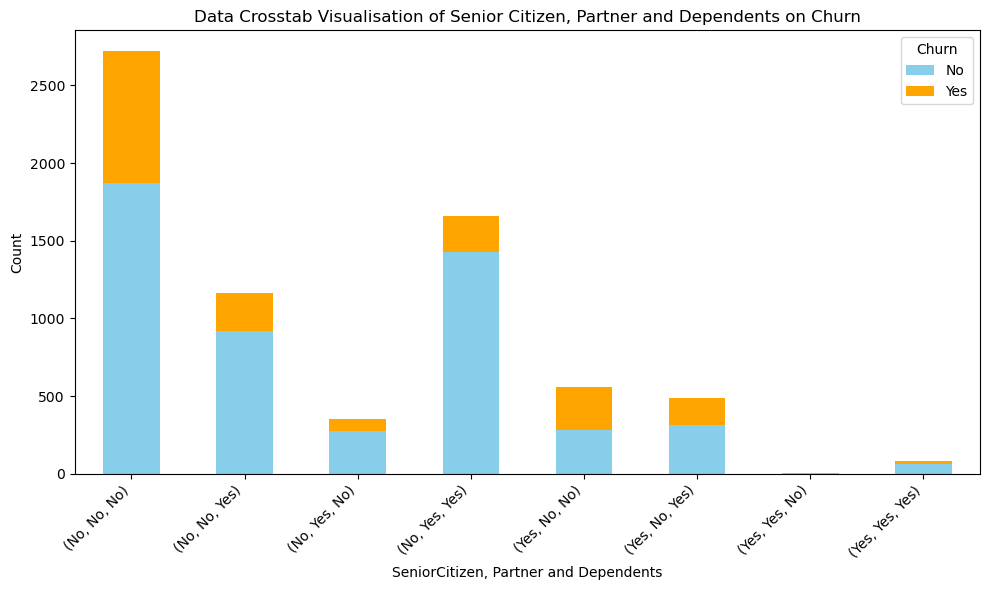

In [80]:
data_crosstab = pd.crosstab(index=[cs_data['SeniorCitizenCat'], 
							cs_data['Dependents'], cs_data['Partner']],
                            columns= cs_data['Churn']) 
# Plotting the crosstab
ax = data_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

plt.title('Data Crosstab Visualisation of Senior Citizen, Partner and Dependents on Churn')
plt.xlabel('SeniorCitizen, Partner and Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Relationship between senior citizenship, partner status, and dependents on churn
A crosstab analysis reveals that senior and non-senior citizens show distinct churn patterns based on partner status and dependents. Non-senior citizens without dependents or a partner exhibit high churn rates, whereas those with both show the lowest churn rates. Dependents alone also reduce churn but less effectively. Among senior citizens, those without dependents and a partner have high churn rates, while those with both show significantly lower rates. Generally, senior citizens are more likely to churn, but having dependents and a partner considerably lowers their churn rate, both independently and collectively.

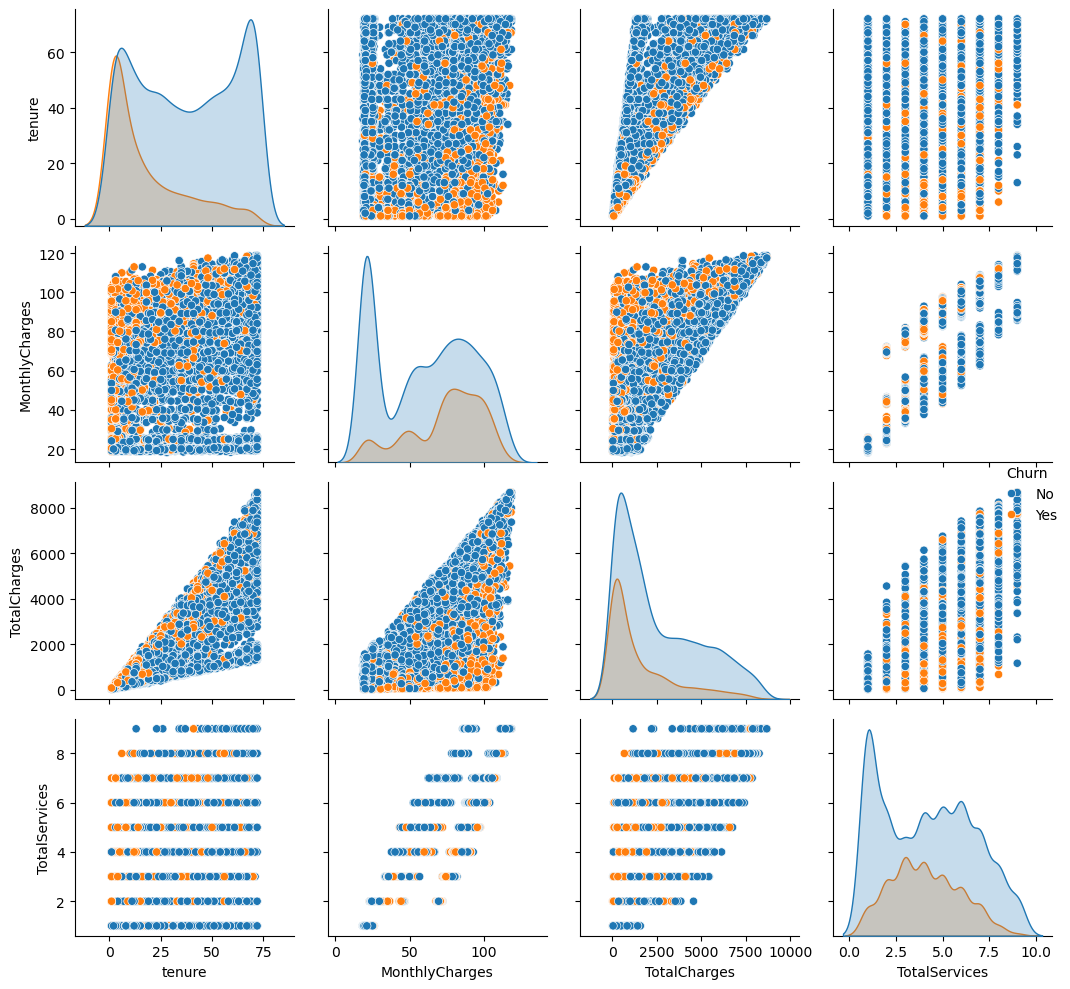

In [82]:
# combine numerical data and encoded label
num_churn_encode = pd.concat([cs_data[numerical_columns], churn_label], axis=1)

# pairplot with numerical columns and churn encoded label as hue
pairplot = sns.pairplot(num_churn_encode, hue='Churn', size=2.5)

plt.tight_layout()
plt.show()

### Summary
The pairplot visualisation reveals that customers with shorter tenures have varied monthly charges, while those with longer tenures tend to have lower charges. There is a linear relationship between tenure and total charges. Higher monthly charges correlate with higher total charges. The distribution of customers across various total services does not clearly indicate a correlation with churn. Key observations show that customers with higher monthly charges and shorter tenures are more likely to churn.

### Correlation of Encoded Data

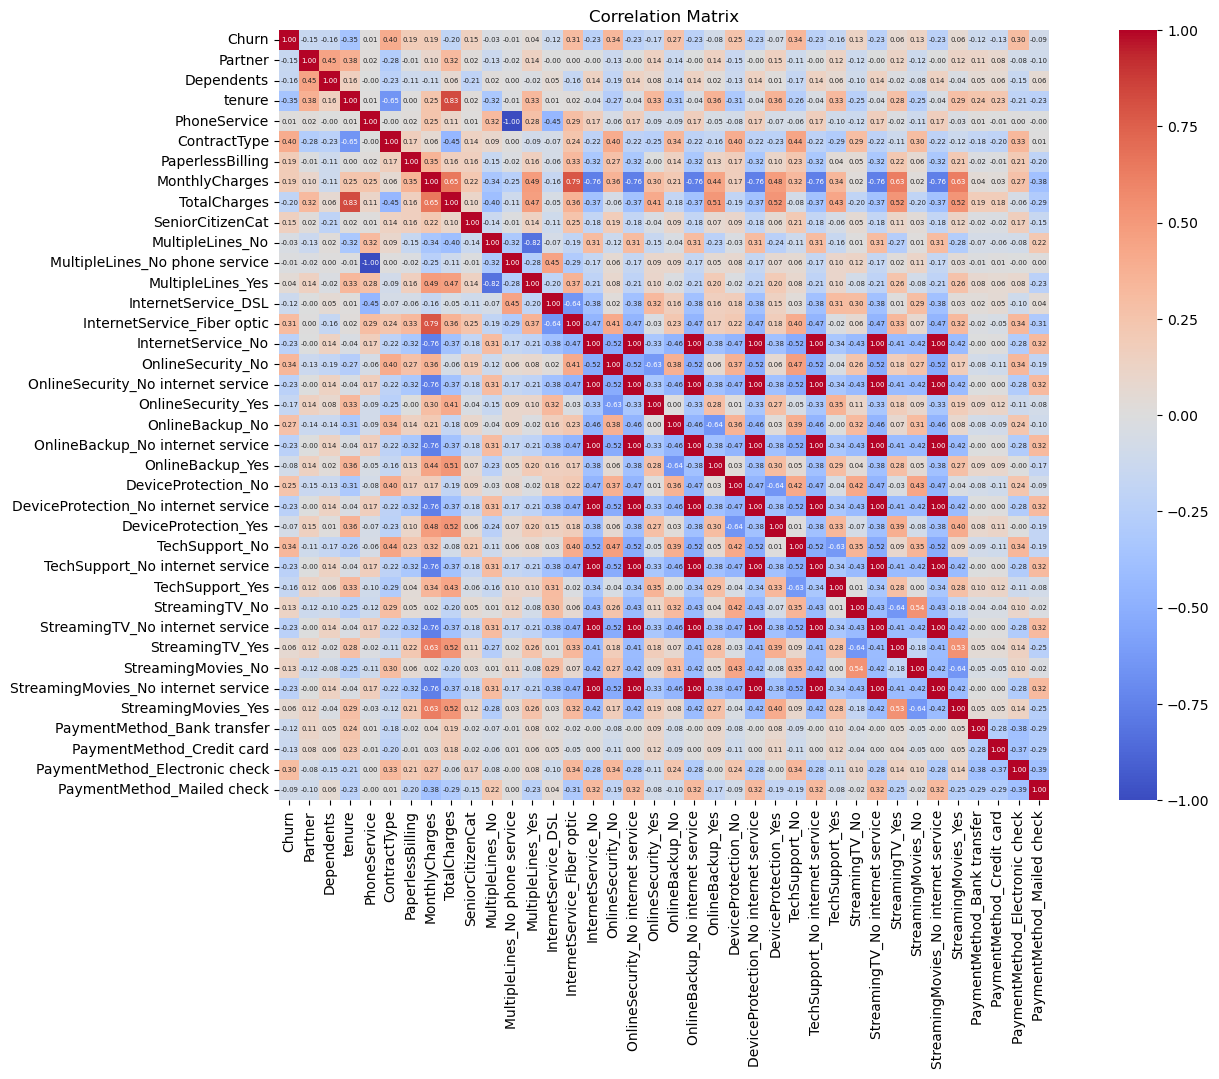

In [47]:
# combine encoded data and encoded label
encode_matrix = pd.concat([churn_label_encode, ml_data], axis=1)

correlation_matrix = encode_matrix.corr()
# visualise correlation
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':5})
plt.title('Correlation Matrix')
plt.show()

### Summary of Correlation
Reviewing the correlation matrix, I noticed some key patterns related to customer churn. Churn has a negative correlation with ContractType (-0.32) and a positive correlation with MonthlyCharges (0.19), implying that shorter contracts and higher charges lead to higher churn. Longer contracts and lower monthly charges correlate (-0.20). Interestingly, MonthlyCharges and TotalCharges are predictably correlated (0.65). PaperlessBilling is linked to higher churn (0.19), as are electronic check payments (0.30). Conversely, bank transfer (-0.17) and credit card payments (-0.13) correlate with lower churn. Senior citizens show a slight propensity to churn (0.15), while longer tenure reduces churn likelihood (-0.35). Service features like PhoneService and StreamingTV have minimal impact on churn.

### Class Distribution

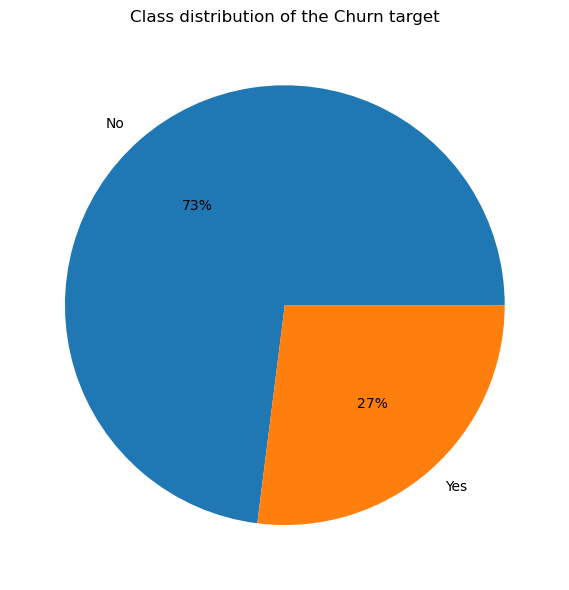

In [107]:
# Class distribution of the Churn target
churn_distribution = churn_label.value_counts(normalize=True) * 100 
churn_distribution = churn_distribution.round(0) 
# visualise the distribution
plt.figure(figsize=(10,6))
plt.title('Class distribution of the Churn target')
plt.pie(churn_distribution, labels=churn_distribution.index, autopct=lambda p: f'{p:.0f}%')
# display the plot
plt.tight_layout()
plt.show()

### Summary of Class Distribution
A pie chart reveals that a majority of customers who did not churn, make up a significant portion of the dataset. Higlighting a class imbalance that needs careful handling in predictive modeling to ensure the minority class (churn) is adequately represented and addressed.

### Feature Engineering (Selection and Extraction)

### Feature Extraction

In [163]:
# extracted a new feature from the contract
# define a function to merge one and two year contracts as long term and montly as short term
def contract_extraction (x):
    if x == 'One year':
        return 'Long Term'
    elif x == 'Two year':
        return 'Long Term'
    else:
        return 'Short Term'
# create a new feature contracttype
cs_data['ContractType'] = cs_data['Contract'].apply(contract_extraction)
cs_data.head(2)

gender Partner Dependents  tenure PhoneService     MultipleLines  \
0  Female     Yes         No       1           No  No phone service   
1    Male      No         No      34          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection  ...  \
0             DSL             No          Yes               No  ...   
1             DSL            Yes           No              Yes  ...   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0              No  Month-to-month              Yes  Electronic check   
1              No        One year               No      Mailed check   

  MonthlyCharges TotalCharges  Churn  TotalServices SeniorCitizenCat  \
0          29.85        29.85     No              2               No   
1          56.95      1889.50     No              4               No   

   ContractType  
0    Short Term  
1     Long Term  

[2 rows x 22 columns]

In [164]:
# Drop the old feature
cs_data.drop('Contract', axis=1, inplace=True)

In [177]:
# select features based on insights from EDA
ml_data = cs_data[['Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'ContractType', 
                   'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizenCat']]

ml_data.head(2)

Partner Dependents  tenure     MultipleLines InternetService OnlineSecurity  \
0     Yes         No       1  No phone service             DSL             No   
1      No         No      34                No             DSL            Yes   

  OnlineBackup DeviceProtection TechSupport ContractType PaperlessBilling  \
0          Yes               No          No   Short Term              Yes   
1           No              Yes          No    Long Term               No   

      PaymentMethod  MonthlyCharges  TotalCharges SeniorCitizenCat  
0  Electronic check           29.85         29.85               No  
1      Mailed check           56.95       1889.50               No

### One-hot coding

In [178]:
# One-hot coding to convert multi-class categorical to binary columns
ml_data = pd.get_dummies(ml_data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                           'DeviceProtection', 'TechSupport', 'PaymentMethod'], drop_first=False)

ml_data.head()

Partner Dependents  tenure ContractType PaperlessBilling  MonthlyCharges  \
0     Yes         No       1   Short Term              Yes           29.85   
1      No         No      34    Long Term               No           56.95   
2      No         No       2   Short Term              Yes           53.85   
3      No         No      45    Long Term               No           42.30   
4      No         No       2   Short Term              Yes           70.70   

   TotalCharges SeniorCitizenCat  MultipleLines_No  \
0         29.85               No             False   
1       1889.50               No              True   
2        108.15               No              True   
3       1840.75               No             False   
4        151.65               No              True   

   MultipleLines_No phone service  ...  DeviceProtection_No  \
0                            True  ...                 True   
1                           False  ...                False   
2                           False  ...                 True   
3                            True  ...                False   
4                           False  ...                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False            False   

   PaymentMethod_Bank transfer  PaymentMethod_Credit card  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                         True                      False   
4                        False                      False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                            True                       False  
1                           False                        True  
2                           False                        True  
3                           False                       False  
4                            True                       False  

[5 rows x 30 columns]

In [179]:
# drop the last column of each category to avoid collinearity
columns_to_drop = ['MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service',
                   'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service',
                   'PaymentMethod_Electronic check'] 

ml_data.drop(columns=columns_to_drop, axis=1, inplace=True)
ml_data.head()

Partner Dependents  tenure ContractType PaperlessBilling  MonthlyCharges  \
0     Yes         No       1   Short Term              Yes           29.85   
1      No         No      34    Long Term               No           56.95   
2      No         No       2   Short Term              Yes           53.85   
3      No         No      45    Long Term               No           42.30   
4      No         No       2   Short Term              Yes           70.70   

   TotalCharges SeniorCitizenCat  MultipleLines_No  MultipleLines_Yes  ...  \
0         29.85               No             False              False  ...   
1       1889.50               No              True              False  ...   
2        108.15               No              True              False  ...   
3       1840.75               No             False              False  ...   
4        151.65               No              True              False  ...   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0               False            False              True                 True   
1                True             True             False                False   
2                True            False              True                 True   
3                True             True             False                False   
4               False             True             False                 True   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  \
0                 False            True            False   
1                  True            True            False   
2                 False            True            False   
3                  True           False             True   
4                 False            True            False   

   PaymentMethod_Bank transfer  PaymentMethod_Credit card  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                         True                      False   
4                        False                      False   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 23 columns]

### One-hot Encoding Summary
I created dummy variables for the following categorical features (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport and PaymentMethod). To avoid collinearity, I manually dropped the last column of each category, increasing the dimensionality and providing a more detailed representation.

### Label encoding

In [181]:
# Label encoding to convert binary columns to numberical values
le = LabelEncoder() # initialise method

# Loop through columns and convert objects and boolean columns to numeric values
for c in ml_data.columns:
    if ml_data[c].dtype == 'object' or ml_data[c].dtype == 'bool':
        ml_data[c] = le.fit_transform(ml_data[c])
    else:
        ml_data[c] = ml_data[c]

ml_data.head(5)

Partner  Dependents  tenure  ContractType  PaperlessBilling  \
0        1           0       1             1                 1   
1        0           0      34             0                 0   
2        0           0       2             1                 1   
3        0           0      45             0                 0   
4        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  SeniorCitizenCat  MultipleLines_No  \
0           29.85         29.85                 0                 0   
1           56.95       1889.50                 0                 1   
2           53.85        108.15                 0                 1   
3           42.30       1840.75                 0                 0   
4           70.70        151.65                 0                 1   

   MultipleLines_Yes  ...  OnlineSecurity_Yes  OnlineBackup_No  \
0                  0  ...                   0                0   
1                  0  ...                   1                1   
2                  0  ...                   1                0   
3                  0  ...                   1                1   
4                  0  ...                   0                1   

   OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_Yes  \
0                 1                    1                     0   
1                 0                    0                     1   
2                 1                    1                     0   
3                 0                    0                     1   
4                 0                    1                     0   

   TechSupport_No  TechSupport_Yes  PaymentMethod_Bank transfer  \
0               1                0                            0   
1               1                0                            0   
2               1                0                            0   
3               0                1                            1   
4               1                0                            0   

   PaymentMethod_Credit card  PaymentMethod_Mailed check  
0                          0                           0  
1                          0                           1  
2                          0                           1  
3                          0                           0  
4                          0                           0  

[5 rows x 23 columns]

### Handle Skewness using Transformers and Scalers

In [54]:
# Create a pipeline with Quantile Transformer and Standard Scaler
transform_and_scale = Pipeline([
    ('quantile_transformer', QuantileTransformer(output_distribution='normal', random_state=42)),
    ('standard_scaler', StandardScaler())
])

# define columns to transform and scale
columns_to_transform = ['TotalCharges', 'tenure', 'MonthlyCharges']

# Apply transformation and scaling
ml_data[columns_to_transform] = transform_and_scale.fit_transform(ml_data[columns_to_transform])

ml_data.head(5)

Partner  Dependents    tenure  PhoneService  ContractType  \
0        1           0 -2.471274             0             1   
1        0           0  0.124108             1             0   
2        0           0 -0.549207             1             1   
3        0           0  0.250104             0             0   
4        0           0 -0.549207             1             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  SeniorCitizenCat  \
0                 1       -0.726267     -1.891983                 0   
1                 0       -0.269655      0.205777                 0   
2                 1       -0.372099     -1.173388                 0   
3                 0       -0.617842      0.186580                 0   
4                 1        0.017336     -1.070737                 0   

   MultipleLines_No  ...  OnlineSecurity_No  OnlineSecurity_Yes  \
0                 0  ...                  1                   0   
1                 1  ...                  0                   1   
2                 1  ...                  0                   1   
3                 0  ...                  0                   1   
4                 1  ...                  1                   0   

   OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                0                 1                    1   
1                1                 0                    0   
2                0                 1                    1   
3                1                 0                    0   
4                1                 0                    1   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  \
0                     0               1                0   
1                     1               1                0   
2                     0               1                0   
3                     1               0                1   
4                     0               1                0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 23 columns]

### Handling Skewness Summary
I successfully transformed and scaled the numerical values using a quantile transformer and standard scaler to normalise the original wide-ranging values, ensuring the data were standardized for better machine learning model performance.

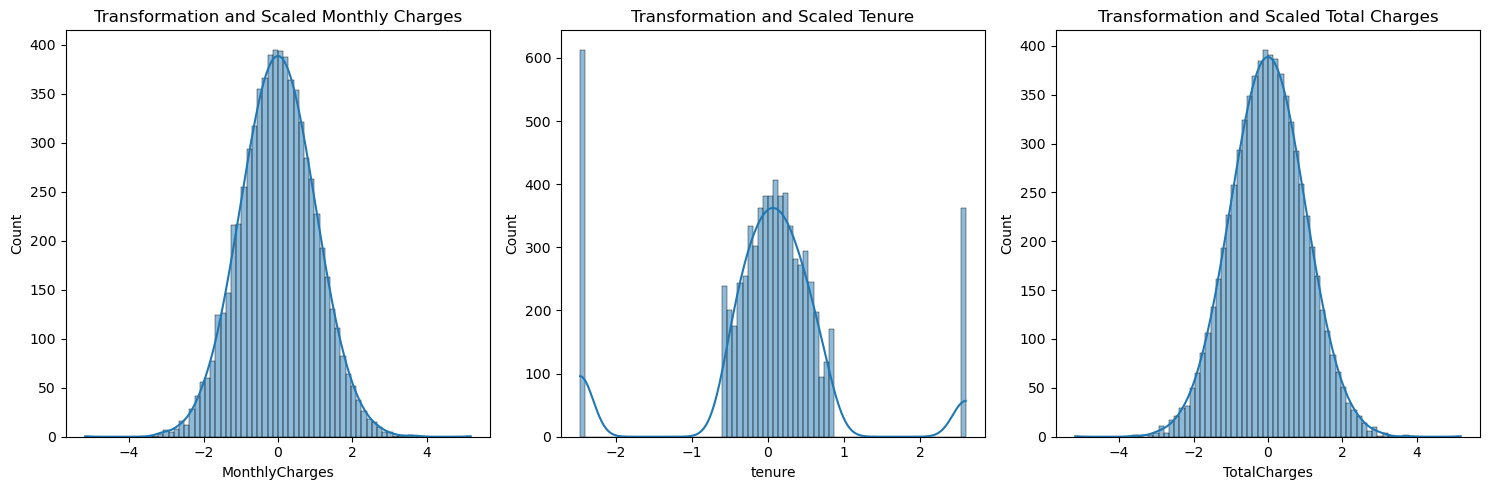

In [184]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
# visualise 
sns.histplot(ml_features['MonthlyCharges'], kde=True, ax=axs[0]).set_title('Transformation and Scaled Monthly Charges')
sns.histplot(ml_features['tenure'], kde=True, ax=axs[1]).set_title('Transformation and Scaled Tenure')
sns.histplot(ml_features['TotalCharges'], kde=True, ax=axs[2]).set_title('Transformation and Scaled Total Charges')                                                              
# display plot
plt.tight_layout()
plt.show()

### Data Splitting

In [193]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
     ml_data, churn_label_encode.squeeze(), test_size=0.2, random_state=42
)

X_train.shape, y_train.shape

((5625, 23), (5625,))

### Class Balancing

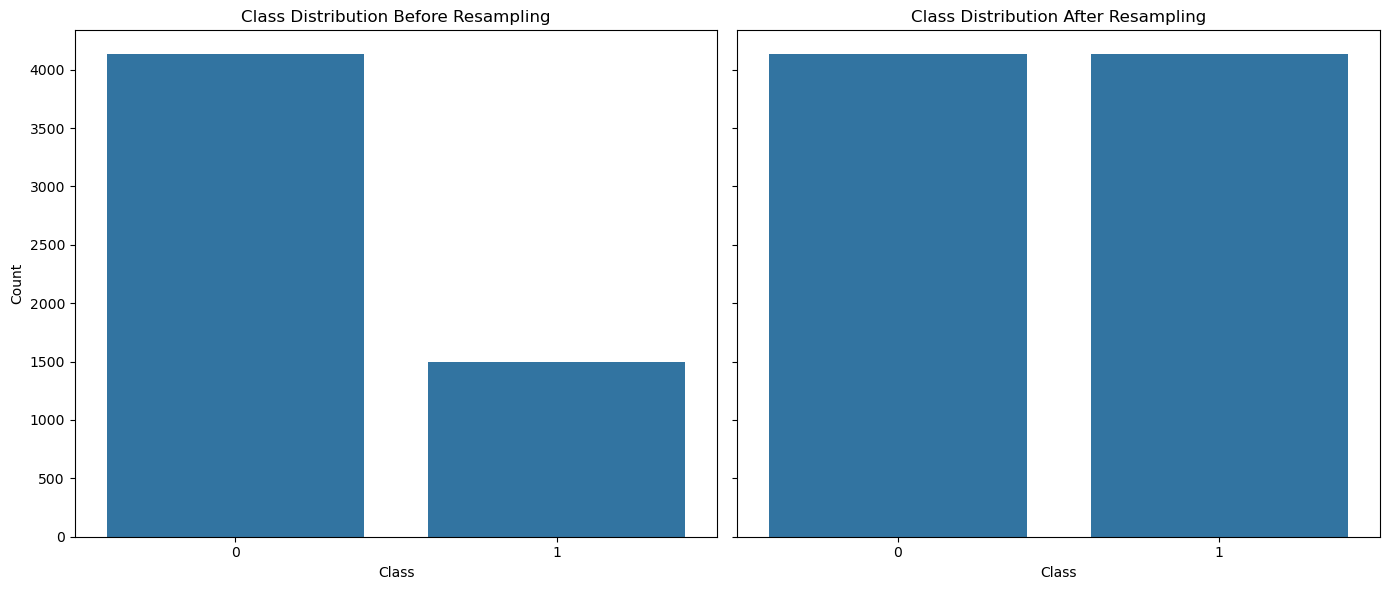

In [195]:
# Handle class imbalance
# Define the steps of the pipeline
steps = [
    ('over', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
]

# create pipeline
pipeline = Pipeline(steps=steps)

# Apply the pipeline to the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# Visualise class distribution before and after resampling
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original class distribution
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before Resampling')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Balanced class distribution
sns.countplot(x=y_train_balanced, ax=axes[1])
axes[1].set_title('Class Distribution After Resampling')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()

### Model Selection and Training

In [199]:
X_train_balanced.shape, y_train_balanced.shape

((8260, 23), (8260,))

In [200]:
X_test.shape, y_test.shape

((1407, 23), (1407,))

In [202]:
# Initialise the models
model_classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "Gradient Boosting ": GradientBoostingClassifier(random_state=42)
}

Logistic Regression
Accuracy:  76.61691542288557
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407

AUC-ROC: 0.7136772600442094
Confusion Matrix: 
      0    1
0  853  180
1  149  225


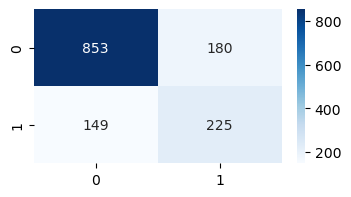



SVC
Accuracy:  69.5095948827292
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1033
           1       0.44      0.57      0.50       374

    accuracy                           0.70      1407
   macro avg       0.63      0.65      0.64      1407
weighted avg       0.72      0.70      0.71      1407

AUC-ROC: 0.6541872227197665
Confusion Matrix: 
      0    1
0  766  267
1  162  212


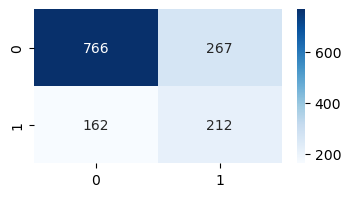



Gradient Boosting 
Accuracy:  77.3276474769012
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407

AUC-ROC: 0.7253405014210208
Confusion Matrix: 
      0    1
0  855  178
1  141  233


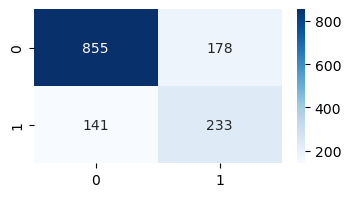

In [203]:
# Train and Evaluate models
for classifiers, model_classifier in model_classifiers.items():
    
    # Training and prediction
    model_classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = model_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(classifiers)
    print("Accuracy: ", accuracy*100)
    print("Classification Report: \n", report)
    matrix_df = pd.DataFrame(matrix)
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))
    print("Confusion Matrix: \n", matrix_df)
    plt.figure(figsize=(4,2))
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.show()
    print("\n") 

### Model Evaluation
When comparing models for customer churn, the focus is on class 1 (customers who churn) because correctly identifying churned customers is often more critical than identifying those who do not churn. Key metrics for evaluation include recall, F1-score, and the confusion matrix, which help measure false negatives. Recall, or true positive rate, indicates the proportion of actual churners correctly identified and is sensitive to false negatives. The F1-score balances precision and recall, reflecting the impact of false negatives. The confusion matrix provides insight into the absolute number of true and false positives and negatives.

I evaluated three models: Logistic Regression, SVC, and Gradient Boosting, using recall and F1-score for class 1. The results were as follows:

- Logistic Regression: Recall = 0.60, F1-score = 0.58
- SVC: Recall = 0.57, F1-score = 0.50
- Gradient Boosting: Recall = 0.62, F1-score = 0.59

Gradient Boosting emerged as the best model, with the highest recall and F1-score for class 1, indicating its superior ability to identify churned customers and making it the best fit for customer churn analysis.

### Hyperparameter Tuning

Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.1}
Best cross-validation score: 0.77
Accuracy: 0.6147832267235253
AUC-ROC: 0.7129240413933768
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.50      0.66      1033
           1       0.40      0.92      0.56       374

    accuracy                           0.61      1407
   macro avg       0.67      0.71      0.61      1407
weighted avg       0.80      0.61      0.63      1407

Confusion Matrix:
[[520 513]
 [ 29 345]]


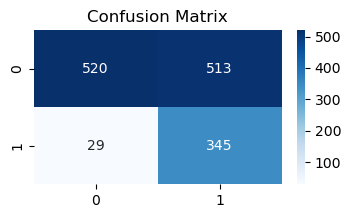

In [251]:
# Apply the pipeline to the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# Define parameter grid
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2],
    'subsample': [0.7],
    'max_features': ['sqrt']
}

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=gbc, param_distributions=param_grid, n_iter=50, 
    cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters: {best_params}")
print("Best cross-validation score: {:.2f}".format(best_score))

# Calculate sample weights for the balanced training data
class_weights = {0: 1.0, 1: 70 / 30}  
sample_weights_balanced = np.array([class_weights[class_label] for class_label in y_train_balanced])

# Train the model with the best parameters and sample weights
best_gbc = random_search.best_estimator_
best_gbc.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights_balanced)

# Make predictions
y_pred_bs = best_gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_bs)
conf_matrix = confusion_matrix(y_test, y_pred_bs)
class_report = classification_report(y_test, y_pred_bs)
auc_roc = roc_auc_score(y_test, y_pred_bs)

# Display results
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {auc_roc}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g').set_title('Confusion Matrix')
plt.show()

### Hyperparameter Tuning Evaluation Summary
After cross-validation, I selected the best parameters for the Gradient Boosting Classifier [subsample (0.7), n_estimators (50), max_features ('sqrt'), max_depth (2), and learning_rate (0.1)]. These settings provided the best performance with a cross-validation score of 77%.

On further testing, the model achieved an accuracy of 61.48%, and its AUC-ROC score was 71.29%, indicating the model's ability to distinguish between the positive and negative classes.

For the majority class (class 0), precision was high at 95%, recall was 50%, and the resulting F1 Score was 66%. Conversely, for the minority class (class 1), precision was 40%, with a recall of 92%, resulting in an F1 Score of 56%. 

The confusion matrix revealed 520 true positives and 513 false positives for class 0, 29 false negatives, and 345 true positives for class 1. Overall, the model excelled in identifying the minority class but had many false positives.

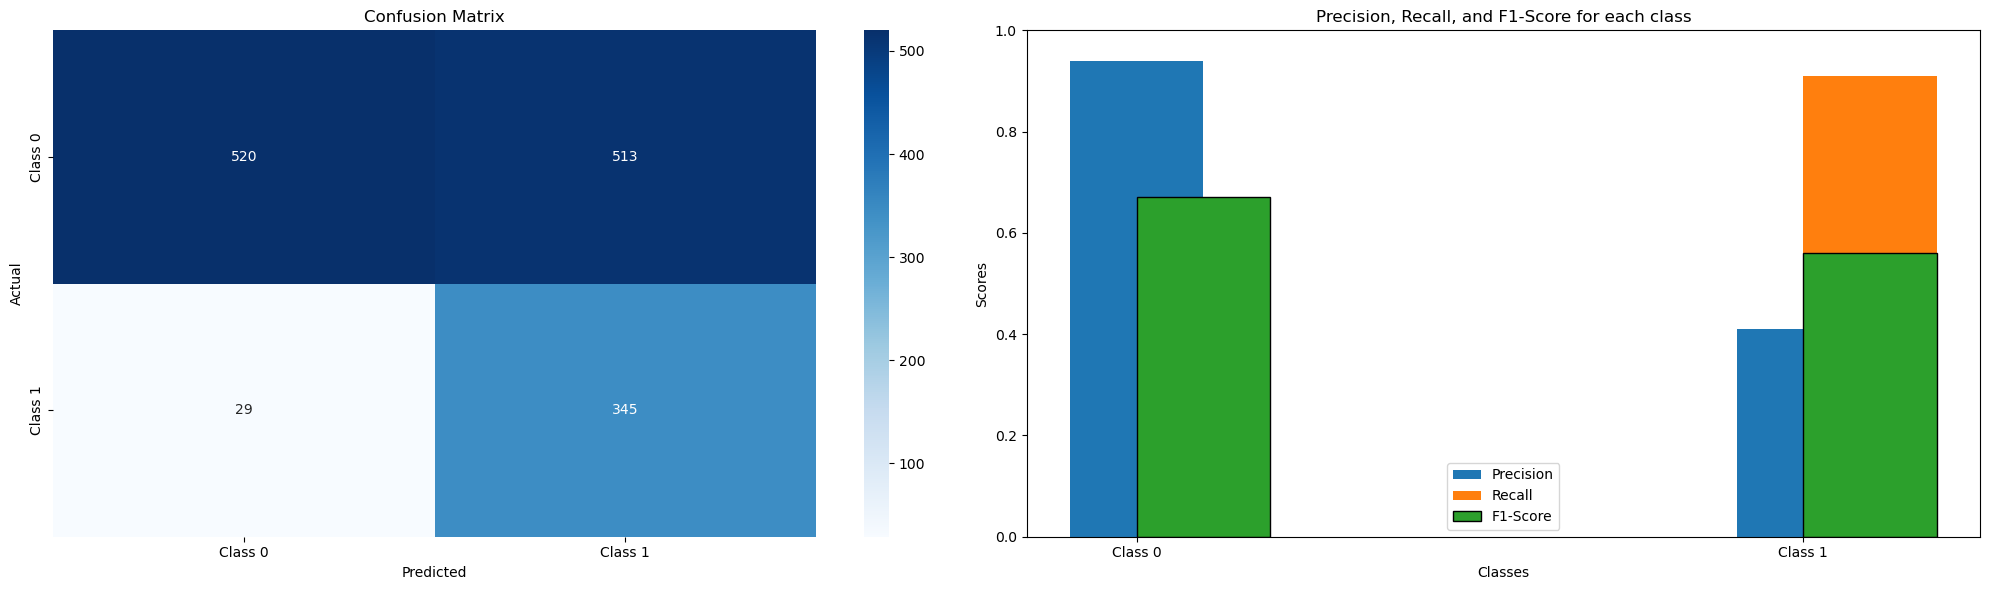

In [252]:
classification_report_dict = {
    'class_0': {'precision': 0.94, 'recall': 0.52, 'f1-score': 0.67, 'support': 1033},
    'class_1': {'precision': 0.41, 'recall': 0.91, 'f1-score': 0.56, 'support': 374},
    'accuracy': 0.62,
    'macro avg': {'precision': 0.67, 'recall': 0.72, 'f1-score': 0.62, 'support': 1407},
    'weighted avg': {'precision': 0.80, 'recall': 0.62, 'f1-score': 0.64, 'support': 1407}
}

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Confusion matrix visualization
sns.heatmap(conf_matrix, ax=ax[0], annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_title('Confusion Matrix')

# Precision, Recall, F1-Score visualization
labels = ['Class 0', 'Class 1']
precision = [classification_report_dict['class_0']['precision'], classification_report_dict['class_1']['precision']]
recall = [classification_report_dict['class_0']['recall'], classification_report_dict['class_1']['recall']]
f1_score = [classification_report_dict['class_0']['f1-score'], classification_report_dict['class_1']['f1-score']]

x = range(len(labels))

# Visualise Precision, Recall, and F1-Score for each class
ax[1].bar(x, precision, width=0.2, label='Precision', align='center')
ax[1].bar(x, recall, width=0.2, label='Recall', align='edge')
ax[1].bar(x, f1_score, width=0.2, label='F1-Score', align='edge', edgecolor='black')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Scores')
ax[1].set_title('Precision, Recall, and F1-Score for each class')
ax[1].legend()

plt.tight_layout()
plt.show()

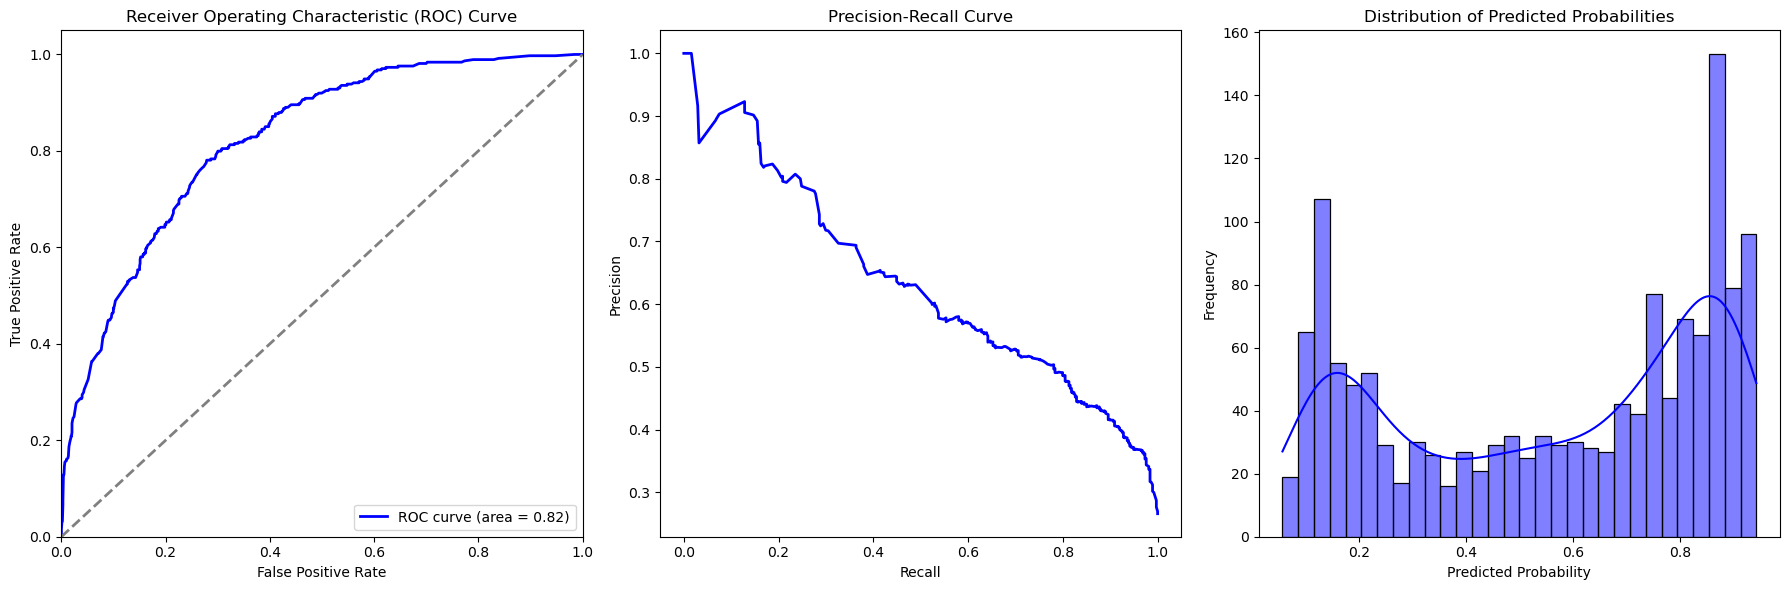

In [235]:
# Get the predicted probabilities for the positive class
y_pred_proba = best_gbc.predict_proba(X_test)[:, 1]

# ROC curve visualization
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot ROC curve
axes[0].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")

# Plot Precision-Recall curve
axes[1].plot(recall, precision, color='blue', lw=2)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')

# Plot Distribution of predicted probabilities
sns.histplot(y_pred_proba, kde=True, bins=30, color='blue', ax=axes[2])
axes[2].set_xlabel('Predicted Probability')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Predicted Probabilities')

# Adjust layout
plt.tight_layout()
plt.show()

### Model Interpretation

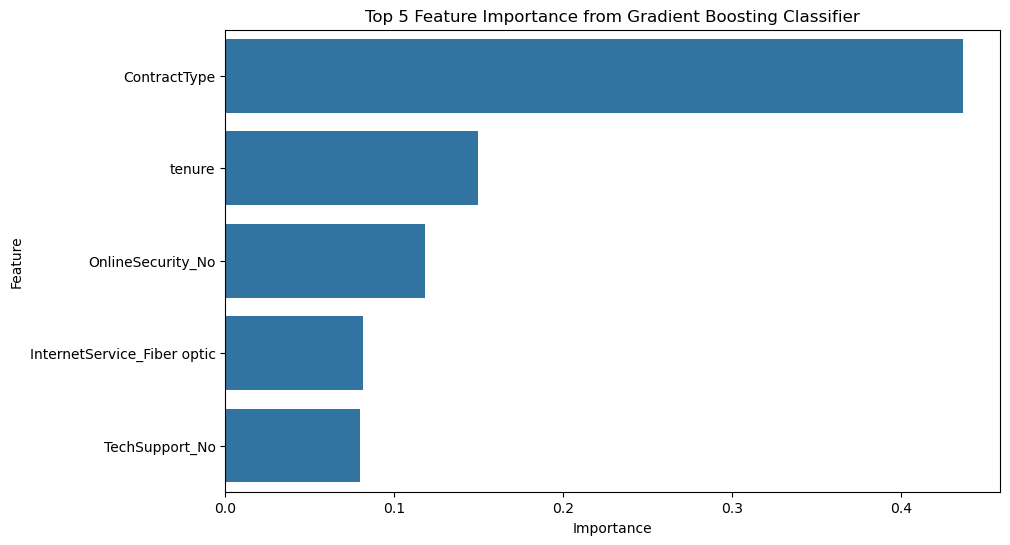

In [226]:
# Feature Importance
feature_importance = best_gbc.feature_importances_
feature_names = X_train_balanced.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Select top 5 features
top_5_features_df = feature_importance_df.head(5)

# Plot top 5 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features_df)
plt.title('Top 5 Feature Importance from Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Model Insights

### Summary and Interpretation of Customer Churn Analysis

#### Best Parameters and Model Training
- **Best Parameters**: The Gradient Boosting Classifier was optimised using the following parameters:
  - `subsample`: 0.7
  - `n_estimators`: 50
  - `max_features`: 'sqrt'
  - `max_depth`: 2
  - `learning_rate`: 0.1
- **Best Cross-Validation Score**: 0.77
  - The model achieved an average accuracy of 77% during cross-validation.

#### Test Set Performance
- **Accuracy**: 61.48%
  - The model correctly predicted the churn status of 61.48% of the customers in the test set.
- **AUC-ROC**: 0.7129
  - The model has a reasonably good ability to distinguish between customers who churn and those who do not, with an AUC-ROC of 0.7129. Values above 0.7 are generally considered good.

#### Details of Key Performance Metrics
- **Class 0 (Non-Churners)**:
  - **Precision**: 0.95
    - When the model predicts a customer will not churn, it is correct 95% of the time.
  - **Recall**: 0.50
    - The model correctly identifies 50% of the actual non-churners.
  - **F1-score**: 66%
- **Class 1 (Churners)**:
  - **Precision**: 0.40
    - When the model predicts a customer will churn, it is correct 40% of the time.
  - **Recall**: 0.92
    - The model correctly identifies 92% of the actual churners.
  - **F1-score**: 56%

#### Confusion Matrix
- **True Positives (TP)**: 345 (Churners correctly predicted as churners)
- **True Negatives (TN)**: 520 (Non-churners correctly predicted as non-churners)
- **False Positives (FP)**: 513 (Non-churners incorrectly predicted as churners)
- **False Negatives (FN)**: 29 (Churners incorrectly predicted as non-churners)

### Interpretation and Business Implications
- **High Recall for Churners**:
  - The model was very good at identifying customers who are likely to churn, with a recall of 92%, which is crucial for a customer churn analysis model, as it ensures most potential churners are flagged.
- **Low Precision for Churners**:
  - The precision for churners is relatively low at 40%, indicating a high number of false positives, which means many customers predicted to churn actually do not churn. Although this could lead to unnecessary retention efforts, it's generally more acceptable to err on the side of caution in churn prediction.
- **Balanced Approach**:
  - The overall accuracy and AUC-ROC indicate that the model performs reasonably well. However, techniques to improve precision without significantly affecting recall should be considered and implemented to make the analysis more robust.

### Conclusion
- **Business Action Points**:
  - **Retention Strategies**: The high recall indicates that the model can effectively identify most churners. ConnectTel can implement targeted retention strategies like special offers, personalized communication, or enhanced customer service.
  - **Resource Allocation**: While the model might suggest some false positives, businesses can allocate resources to address potential churners, knowing that the majority flagged by the model are indeed at risk.

### Model Saving

In [254]:
# Save Model Using Joblib
from joblib import dump, load
# save the model to disk

# Save the trained model to a file using Joblib
model_path = 'gradient_boosting_model.joblib'
dump(best_gbc, model_path)
 
# # load and validate model from disk
# load_model = load(model_path)
# # print
# print(f"Model Accuracy: {load_model.score(X_test, y_test)}")

['/Users/gentleiyke/Downloads/obim_jobs/10analytics/Capstone_01/gradient_boosting_model.joblib']

---

### Ikemefula Solomon ORIAKU
**Location:** London, UK  
**Email:** [sioriaku@gmail.com](mailto:sioriaku@gmail.com)  
**GitHub:** [github.com/gentleiyke](https://github.com/gentleiyke)  
**LinkedIn:** [linkedin.com/in/gentleiyke](https://www.linkedin.com/in/gentleiyke)
